In [1]:
import pandas as pd
import functions as func
import numpy as np
import yaml
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from IPython.display import display
from scipy import stats
import plotly.express as px


In [2]:
import os
print(os.getcwd()) 

/Users/mehdisahraoui/Desktop/IronHackordner/Iron_Hack_Final_Project/Week9/Iron_Hack_Water_in_Tunisia/notebooks


In [3]:
from functions import clean_data, feature_engineering, split_data, train_model, evaluate_model, plot_predictions

# Data Understanding and cleaning



In [8]:
# Paths to your two data files
tunis_dams_rain_data_path = '../data/raw/tunis_dams_rain_mehdi.csv'
weather_data_path = '../data/raw/weather.csv'

def load_data(file_path):
    """Loads CSV file into a pandas DataFrame."""
    return pd.read_csv(file_path)
tunis_dams_rain_data = load_data(tunis_dams_rain_data_path)
weather_data = load_data(weather_data_path)
# Display a preview of each dataset
display(tunis_dams_rain_data.head())
display(weather_data.head())


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.201,2.4,3.255,0.293,2.822,9.820,1.604,4.608,NaN,NaN
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.201,2.4,2.201,0.134,1.549,8.170,1.491,3.558,NaN,NaN
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.201,2.4,1.590,0.140,0.924,7.100,1.413,2.789,NaN,NaN
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.201,2.4,0.998,1.116,1.882,12.562,1.209,4.705,NaN,NaN
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.201,2.4,3.215,0.285,2.770,9.735,1.599,4.584,NaN,NaN


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2014-01-01,6.8,1.3,14.7,0.0,NaN,273.0,19.3,NaN,NaN,NaN
1,2014-01-02,7.5,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,10.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,10.6,3.5,18.8,0.0,NaN,197.0,9.5,NaN,NaN,NaN
4,2014-01-05,11.7,8.9,20.0,0.0,NaN,NaN,9.2,NaN,NaN,NaN


In [10]:
# Display dataset previews
def preview_data(df, name):
    """Displays the first 5 rows of a DataFrame."""
    print(f"Preview of {name}:")
    display(df.head())

preview_data(tunis_dams_rain_data, 'tunis_dams_rain_data')
preview_data(weather_data, 'weather_data')


Preview of tunis_dams_rain_data:


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.201,2.4,3.255,0.293,2.822,9.820,1.604,4.608,NaN,NaN
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.201,2.4,2.201,0.134,1.549,8.170,1.491,3.558,NaN,NaN
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.201,2.4,1.590,0.140,0.924,7.100,1.413,2.789,NaN,NaN
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.201,2.4,0.998,1.116,1.882,12.562,1.209,4.705,NaN,NaN
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.201,2.4,3.215,0.285,2.770,9.735,1.599,4.584,NaN,NaN


Preview of weather_data:


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2014-01-01,6.8,1.3,14.7,0.0,NaN,273.0,19.3,NaN,NaN,NaN
1,2014-01-02,7.5,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,10.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,10.6,3.5,18.8,0.0,NaN,197.0,9.5,NaN,NaN,NaN
4,2014-01-05,11.7,8.9,20.0,0.0,NaN,NaN,9.2,NaN,NaN,NaN


In [12]:
# Check for missing values
def check_missing_values(df, name):
    print(f"Checking for missing values in {name}:")
    print(df.isnull().sum())

check_missing_values(tunis_dams_rain_data, 'tunis_dams_rain_data')
check_missing_values(weather_data, 'weather_data')


Checking for missing values in tunis_dams_rain_data:
date              0
MELLEGUE          0
BEN METIR         0
KASSEB            0
BARBARA           0
SIDI SALEM        0
BOU-HEURTMA       0
JOUMINE           0
GHEZALA           0
SEJNANE           0
S. EL BARRAK      0
SILIANA           0
LAKHMESS          0
RMIL              0
BIR M'CHERGA      0
RMEL              0
NEBHANA           0
SIDI SAAD         0
EL HAOUAREB       0
SIDI AÏCH         0
EL BREK           0
BEZIRK            0
CHIBA             0
MASRI             0
LEBNA             0
HMA               4
ABID              4
Zarga           755
Ziatine         755
dtype: int64
Checking for missing values in weather_data:
date       0
tavg       0
tmin      94
tmax      63
prcp     154
snow    1978
wdir     581
wspd     315
wpgt    1978
pres     960
tsun    1978
dtype: int64


In [14]:
# Step 2: Check for missing values
print("Checking for missing values in tunis_dams_rain_data:")
print(tunis_dams_rain_data.isnull().sum())

print("\nChecking for missing values in weather_data:")
print(weather_data.isnull().sum())


Checking for missing values in tunis_dams_rain_data:
date              0
MELLEGUE          0
BEN METIR         0
KASSEB            0
BARBARA           0
SIDI SALEM        0
BOU-HEURTMA       0
JOUMINE           0
GHEZALA           0
SEJNANE           0
S. EL BARRAK      0
SILIANA           0
LAKHMESS          0
RMIL              0
BIR M'CHERGA      0
RMEL              0
NEBHANA           0
SIDI SAAD         0
EL HAOUAREB       0
SIDI AÏCH         0
EL BREK           0
BEZIRK            0
CHIBA             0
MASRI             0
LEBNA             0
HMA               4
ABID              4
Zarga           755
Ziatine         755
dtype: int64

Checking for missing values in weather_data:
date       0
tavg       0
tmin      94
tmax      63
prcp     154
snow    1978
wdir     581
wspd     315
wpgt    1978
pres     960
tsun    1978
dtype: int64


In [16]:
# Remove duplicates
def remove_duplicates(df, name):
    cleaned_df = df.drop_duplicates()
    print(f"{name} after removing duplicates:")
    display(cleaned_df.head())
    return cleaned_df

tunis_dams_rain_data_cleaned = remove_duplicates(tunis_dams_rain_data, 'tunis_dams_rain_data')
weather_data_cleaned = remove_duplicates(weather_data, 'weather_data')

tunis_dams_rain_data after removing duplicates:


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.201,2.4,3.255,0.293,2.822,9.820,1.604,4.608,NaN,NaN
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.201,2.4,2.201,0.134,1.549,8.170,1.491,3.558,NaN,NaN
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.201,2.4,1.590,0.140,0.924,7.100,1.413,2.789,NaN,NaN
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.201,2.4,0.998,1.116,1.882,12.562,1.209,4.705,NaN,NaN
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.201,2.4,3.215,0.285,2.770,9.735,1.599,4.584,NaN,NaN


weather_data after removing duplicates:


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2014-01-01,6.8,1.3,14.7,0.0,NaN,273.0,19.3,NaN,NaN,NaN
1,2014-01-02,7.5,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,10.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,10.6,3.5,18.8,0.0,NaN,197.0,9.5,NaN,NaN,NaN
4,2014-01-05,11.7,8.9,20.0,0.0,NaN,NaN,9.2,NaN,NaN,NaN


In [18]:
# Check data types
def check_data_types(df, name):
    """Prints the data types of each column in a DataFrame."""
    print(f"Data types in {name}:")
    print(df.dtypes)

check_data_types(tunis_dams_rain_data_cleaned, 'tunis_dams_rain_data')
check_data_types(weather_data_cleaned, 'weather_data')


Data types in tunis_dams_rain_data:
date             object
MELLEGUE        float64
BEN METIR       float64
KASSEB          float64
BARBARA         float64
SIDI SALEM      float64
BOU-HEURTMA     float64
JOUMINE         float64
GHEZALA         float64
SEJNANE         float64
S. EL BARRAK    float64
SILIANA         float64
LAKHMESS        float64
RMIL            float64
BIR M'CHERGA    float64
RMEL            float64
NEBHANA         float64
SIDI SAAD       float64
EL HAOUAREB     float64
SIDI AÏCH       float64
EL BREK         float64
BEZIRK          float64
CHIBA           float64
MASRI           float64
LEBNA           float64
HMA             float64
ABID            float64
Zarga           float64
Ziatine         float64
dtype: object
Data types in weather_data:
date     object
tavg    float64
tmin    float64
tmax    float64
prcp    float64
snow    float64
wdir    float64
wspd    float64
wpgt    float64
pres    float64
tsun    float64
dtype: object


In [20]:
display(tunis_dams_rain_data_cleaned.head())


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.201,2.4,3.255,0.293,2.822,9.820,1.604,4.608,NaN,NaN
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.201,2.4,2.201,0.134,1.549,8.170,1.491,3.558,NaN,NaN
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.201,2.4,1.590,0.140,0.924,7.100,1.413,2.789,NaN,NaN
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.201,2.4,0.998,1.116,1.882,12.562,1.209,4.705,NaN,NaN
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.201,2.4,3.215,0.285,2.770,9.735,1.599,4.584,NaN,NaN


In [22]:
# Feature Engineering
def add_date_features(df, name):
    """Adds year, month, and day features from a 'date' column if present."""
    if 'date' in df.columns:
        df['Year'] = pd.DatetimeIndex(df['date']).year
        df['Month'] = pd.DatetimeIndex(df['date']).month
        df['Day'] = pd.DatetimeIndex(df['date']).day
        print(f"Added date features to {name}.")
    return df

def add_rainfall_feature(df):
    """Adds a cumulative rainfall feature if 'rainfall' column exists."""
    if 'rainfall' in df.columns:
        df['Cumulative_Rainfall'] = df['rainfall'].cumsum()
        print("Added 'Cumulative_Rainfall' feature.")
    return df

def add_temperature_change_feature(df):
    """Adds a temperature change feature if 'temperature' column exists."""
    if 'temperature' in df.columns:
        df['Temperature_Change'] = df['temperature'].diff()
        print("Added 'Temperature_Change' feature.")
    return df


In [24]:
# Display the updated datasets to verify the new features
print("Updated tunis_dams_rain_data with new features:")
display(tunis_dams_rain_data_cleaned.head())

print("\nUpdated weather_data with new features:")
display(weather_data_cleaned.head())

Updated tunis_dams_rain_data with new features:


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.201,2.4,3.255,0.293,2.822,9.820,1.604,4.608,NaN,NaN
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.201,2.4,2.201,0.134,1.549,8.170,1.491,3.558,NaN,NaN
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.201,2.4,1.590,0.140,0.924,7.100,1.413,2.789,NaN,NaN
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.201,2.4,0.998,1.116,1.882,12.562,1.209,4.705,NaN,NaN
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.201,2.4,3.215,0.285,2.770,9.735,1.599,4.584,NaN,NaN



Updated weather_data with new features:


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2014-01-01,6.8,1.3,14.7,0.0,NaN,273.0,19.3,NaN,NaN,NaN
1,2014-01-02,7.5,NaN,14.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-03,10.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-04,10.6,3.5,18.8,0.0,NaN,197.0,9.5,NaN,NaN,NaN
4,2014-01-05,11.7,8.9,20.0,0.0,NaN,NaN,9.2,NaN,NaN,NaN


In [27]:
# Fill all NaN values with 0 in both datasets
tunis_dams_rain_data_cleaned = tunis_dams_rain_data_cleaned.fillna(0)
weather_data_cleaned = weather_data_cleaned.fillna(0)

# Display the datasets after handling NaN values
print("tunis_dams_rain_data after handling NaN values (filled with 0):")
display(tunis_dams_rain_data_cleaned.head())

print("\nweather_data after handling NaN values (filled with 0):")
display(weather_data_cleaned.head())

tunis_dams_rain_data after handling NaN values (filled with 0):


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,SIDI AÏCH,EL BREK,BEZIRK,CHIBA,MASRI,LEBNA,HMA,ABID,Zarga,Ziatine
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.201,2.4,3.255,0.293,2.822,9.820,1.604,4.608,0.0,0.0
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.201,2.4,2.201,0.134,1.549,8.170,1.491,3.558,0.0,0.0
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.201,2.4,1.590,0.140,0.924,7.100,1.413,2.789,0.0,0.0
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.201,2.4,0.998,1.116,1.882,12.562,1.209,4.705,0.0,0.0
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.201,2.4,3.215,0.285,2.770,9.735,1.599,4.584,0.0,0.0



weather_data after handling NaN values (filled with 0):


,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2014-01-01,6.8,1.3,14.7,0.0,0.0,273.0,19.3,0.0,0.0,0.0
1,2014-01-02,7.5,0.0,14.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-01-03,10.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-01-04,10.6,3.5,18.8,0.0,0.0,197.0,9.5,0.0,0.0,0.0
4,2014-01-05,11.7,8.9,20.0,0.0,0.0,0.0,9.2,0.0,0.0,0.0


In [29]:
#Filling all NaN values with 0: This code replaces all missing (NaN) values in both DataFrames (tunis_dams_rain_data_cleaned and weather_data_cleaned) with 0.
#This ensures that no missing data remains, which can be useful for models that don't handle missing values well.
#It prevents the distortion of any future calculations or analyses due to missing data.


In [31]:
# Step: Join the two datasets by the common attribute 'date'

# Merge the two datasets on the 'date' column
merged_data = pd.merge(tunis_dams_rain_data_cleaned, weather_data_cleaned, on='date', how='inner')

# Display the merged dataset
print("Merged dataset based on 'date':")
display(merged_data.head())


Merged dataset based on 'date':


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,9.5,0.0,17.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,9.9,7.9,17.1,0.0,0.0,213.0,10.7,0.0,0.0,0.0
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,10.7,6.8,17.6,0.0,0.0,0.0,8.3,0.0,0.0,0.0
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,12.1,10.1,18.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,13.1,10.8,19.1,0.0,0.0,66.0,16.4,0.0,0.0,0.0


In [33]:
# Load the cleaned weather and rain datasets
weather_data = pd.read_csv('../data/clean/weather_cleaned.csv')
rain_data = pd.read_csv('../data/clean/tunis_dams_rain_cleaned.csv')

# Check the column names to ensure the date columns are correctly named
print("Weather Data Columns:", weather_data.columns)
print("Rain Data Columns:", rain_data.columns)

weather_data['date'] = pd.to_datetime(weather_data['date'])  # If the column is named differently, adjust here
rain_data['date'] = pd.to_datetime(rain_data['date'])        # Same for the rain dataset

# Display the first few rows to verify the data
print(weather_data.head())
print(rain_data.head())

# Now we should be able to merge the datasets based on the date column
merged_data = pd.merge(rain_data, weather_data, on='date', how='left')

# Show the first few rows of the merged dataset
print(merged_data.head())


Weather Data Columns: Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun', 'date'],
      dtype='object')
Rain Data Columns: Index(['MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA', 'SIDI SALEM',
       'BOU-HEURTMA', 'JOUMINE', 'GHEZALA', 'SEJNANE', 'S. EL BARRAK',
       'SILIANA', 'LAKHMESS', 'RMIL', 'BIR M'CHERGA', 'RMEL', 'NEBHANA',
       'SIDI SAAD', 'EL HAOUAREB', 'SIDI AÏCH', 'EL BREK', 'BEZIRK', 'CHIBA',
       'MASRI', 'LEBNA', 'HMA', 'ABID', 'Zarga', 'Ziatine', 'date'],
      dtype='object')
   tavg       tmin       tmax    prcp  snow        wdir       wspd  wpgt  \
0   6.8   1.300000  14.700000  0.0000   NaN  273.000000  19.300000   NaN   
1   7.5  13.759926  14.400000  0.4108   NaN  147.866142  16.403548   NaN   
2  10.4  13.759926  25.855248  0.0000   NaN  147.866142  16.403548   NaN   
3  10.6   3.500000  18.800000  0.0000   NaN  197.000000   9.500000   NaN   
4  11.7   8.900000  20.000000  0.0000   NaN  147.866142   9.200000   NaN  

In [35]:
# Rename the merged dataframe to df_main
df_main = merged_data

# Create a new column for the average water level across all dams
df_main['average_water_level'] = df_main[['MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA']].mean(axis=1)

# Display the updated dataset with the new column
display(df_main.head())


,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,S. EL BARRAK,...,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,average_water_level
0,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,273.385,...,13.759926,17.5,0.0,NaN,147.866142,16.403548,NaN,1016.178487,NaN,50.77100
1,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,264.751,...,7.900000,17.1,0.0,NaN,213.000000,10.700000,NaN,1016.178487,NaN,47.21125
2,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,259.239,...,6.800000,17.6,0.0,NaN,147.866142,8.300000,NaN,1016.178487,NaN,46.14775
3,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,255.256,...,10.100000,18.3,0.0,NaN,147.866142,16.403548,NaN,1016.178487,NaN,43.08000
4,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,273.234,...,10.800000,19.1,0.0,NaN,66.000000,16.400000,NaN,1016.178487,NaN,50.64675


# Data Analysis (Exploratory Data Analysis - EDA)


## Bivariate Analysis: Scatterplot and Correlation

In [42]:
#Bivariate Analysis: We are visualizing the relationship between the average water level and the average temperature using a scatterplot.
#Correlation: We calculate the correlation coefficient between these two variables to check for a linear relationbship.

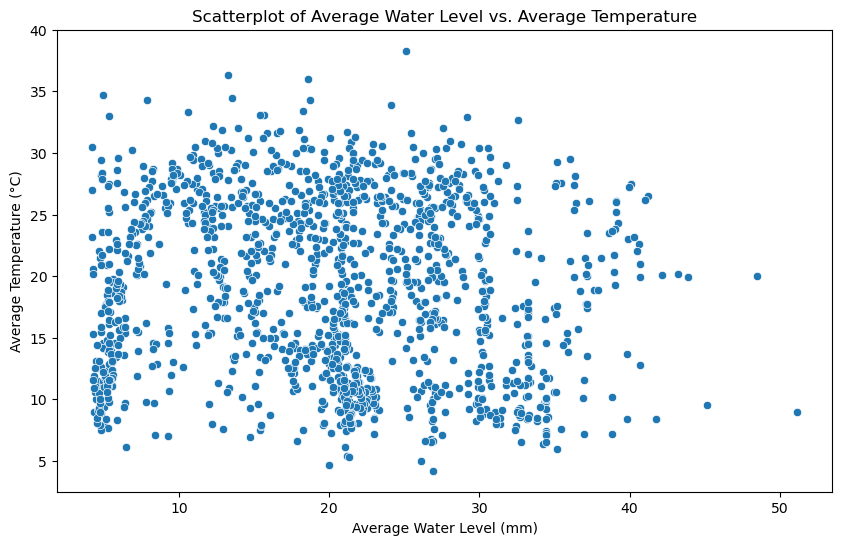

Correlation between average water level and temperature: -0.08329289006570888


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assigning the merged dataset to df_main (if merged_data is already created)
df_main = merged_data  # Make sure merged_data exists and has the correct columns

# Bivariate Analysis: Scatterplot between average water level and average temperature (tavg)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MELLEGUE', y='tavg', data=df_main)  # Adjust column names if necessary
plt.title('Scatterplot of Average Water Level vs. Average Temperature')
plt.xlabel('Average Water Level (mm)')
plt.ylabel('Average Temperature (°C)')
plt.show()

# Calculate correlation between average water level and temperature
correlation = df_main['MELLEGUE'].corr(df_main['tavg'])  # Adjust column names if necessary
print(f'Correlation between average water level and temperature: {correlation}')


## Multivariate Analyse

<Figure size 1200x1000 with 0 Axes>

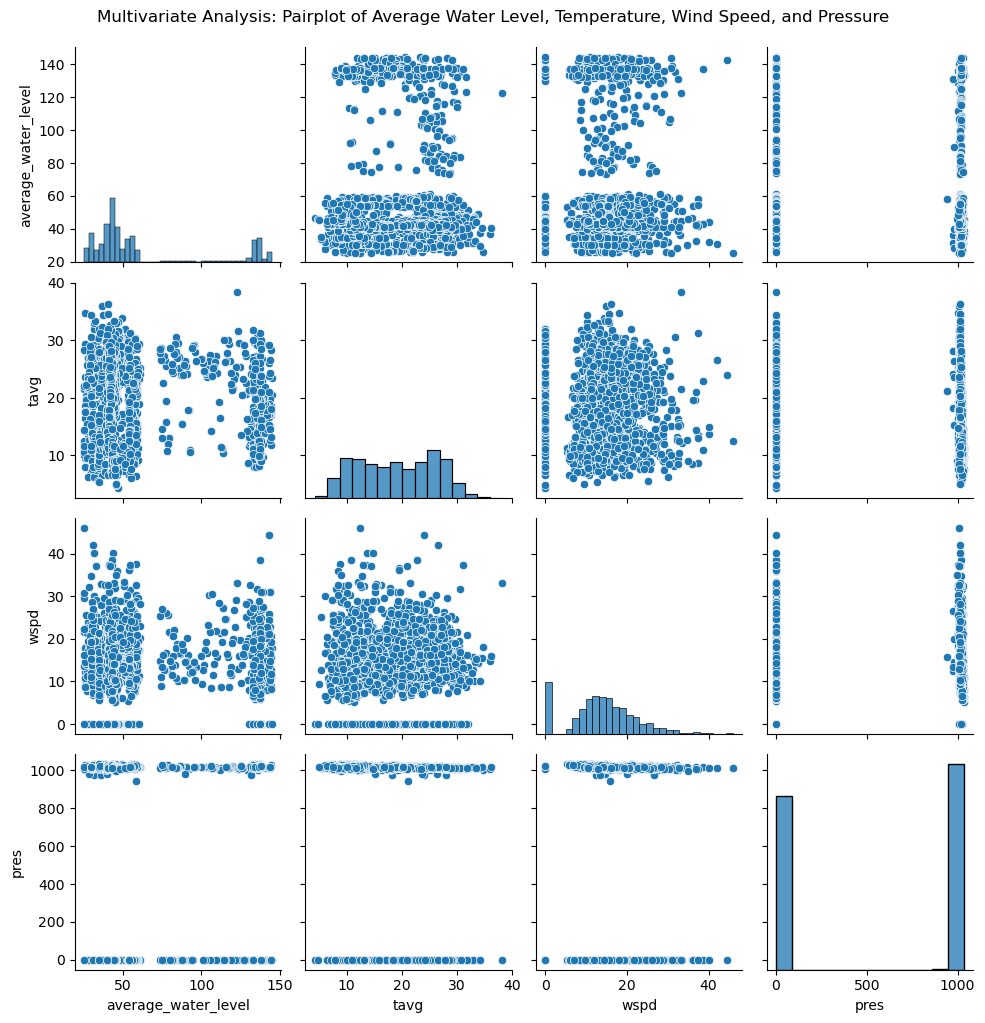

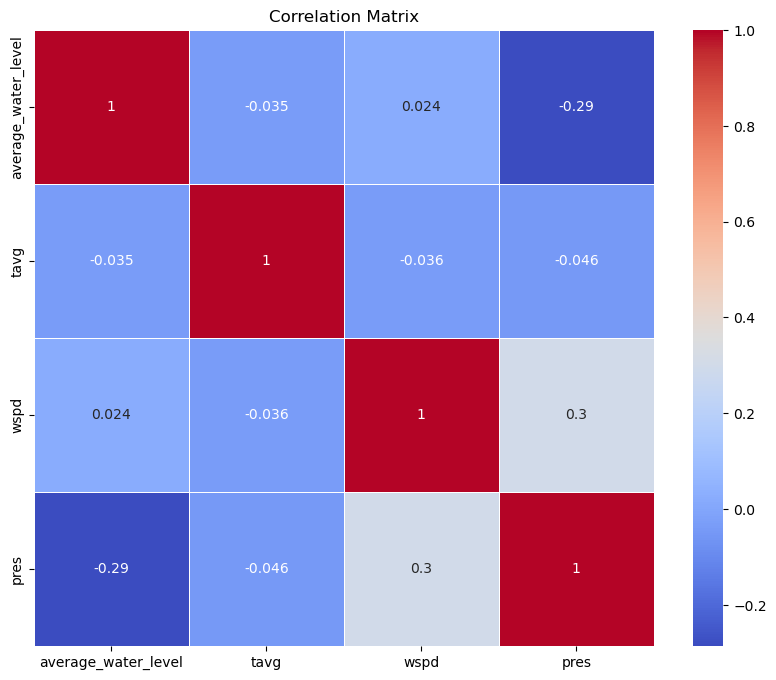

In [47]:
# Load the merged and cleaned dataset
df_main = pd.read_csv('/Users/mehdisahraoui/Desktop/IronHackordner/Iron_Hack_Final_Project/Iron_Hack_Water_in_Tunisia/data/clean/main.csv')

# Ensure 'average_water_level' exists
if 'average_water_level' not in df_main.columns:
    df_main['average_water_level'] = df_main[['MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA']].mean(axis=1)

# Step 3: Multivariate Analysis

# Beispiel 1: Pairplot zur Visualisierung von Beziehungen zwischen mehreren Variablen
plt.figure(figsize=(12, 10))
sns.pairplot(df_main[['average_water_level', 'tavg', 'wspd', 'pres']]) # 'Month']], hue='Month')
plt.suptitle('Multivariate Analysis: Pairplot of Average Water Level, Temperature, Wind Speed, and Pressure', y=1.02)
plt.show()

# Beispiel 2: Heatmap der Korrelationsmatrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_main[['average_water_level', 'tavg', 'wspd', 'pres']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [48]:
# Convert the date column to datetime format if it's not already
df_main['date'] = pd.to_datetime(df_main['date'])

# Create a new column that categorizes the data into the first six months or the last six months
df_main['half_of_year'] = df_main['date'].dt.month.apply(lambda x: 'First Half' if x <= 6 else 'Second Half')

# Verify the new column
df_main[['date', 'half_of_year']].head()


,date,half_of_year
0,2014-01-08,First Half
1,2014-01-09,First Half
2,2014-01-10,First Half
3,2014-01-12,First Half
4,2014-02-08,First Half


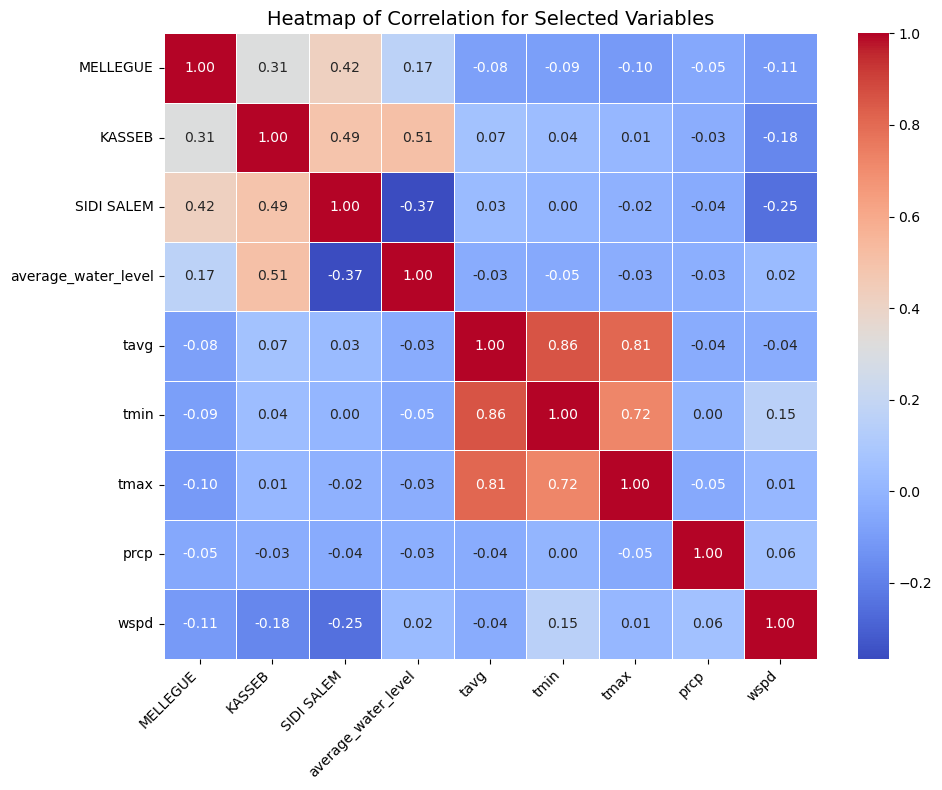

In [49]:
# Select a subset of columns for the correlation matrix (focusing on relevant features)
columns_of_interest = ['MELLEGUE', 'KASSEB', 'SIDI SALEM', 'average_water_level', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd']

# Calculate the correlation matrix for the selected columns
subset_corr_matrix = df_main[columns_of_interest].corr()

# Plot the heatmap with a larger figure size and adjusted font size for better readability
plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 10})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Heatmap of Correlation for Selected Variables', fontsize=14)
plt.tight_layout()  # To ensure everything fits
plt.show()


In [53]:
# Select only numeric columns for the correlation analysis
numeric_df = df_main.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Define the column representing water levels (e.g., 'MELLEGUE')
water_level_column = 'MELLEGUE'

# Get the correlation with the water level column
corr_with_water_level = correlation_matrix[water_level_column].sort_values(ascending=False)

# Display the correlation values
print(f"Correlation with '{water_level_column}':")
print(corr_with_water_level)


Correlation with 'MELLEGUE':
MELLEGUE               1.000000
SILIANA                0.697587
LAKHMESS               0.607517
BEZIRK                 0.559606
ABID                   0.538082
EL BREK                0.528521
EL HAOUAREB            0.498112
SIDI SAAD              0.486861
SIDI SALEM             0.422930
BIR M'CHERGA           0.408866
BEN METIR              0.370670
LEBNA                  0.366181
BOU-HEURTMA            0.361062
KASSEB                 0.312286
SIDI AÏCH              0.309954
JOUMINE                0.302553
S. EL BARRAK           0.258666
NEBHANA                0.240259
CHIBA                  0.235152
average_water_level    0.167898
MASRI                  0.136289
SEJNANE                0.105322
GHEZALA                0.062007
BARBARA                0.056709
Day_y                  0.054884
Day_x                  0.054884
RMIL                   0.043707
RMEL                   0.029051
wdir                   0.007675
HMA                    0.003185
Month_x    

In [55]:
# Check for missing values in the columns
df_main[['snow', 'wpgt', 'tsun']].isna().sum()

# Check for the data types of these columns
print(df_main[['snow', 'wpgt', 'tsun']].dtypes)

# Check if these columns have only a single unique value
print(df_main[['snow', 'wpgt', 'tsun']].nunique())


snow    float64
wpgt    float64
tsun    float64
dtype: object
snow    1
wpgt    1
tsun    1
dtype: int64


In [57]:
df_main = df_main.drop(columns=['snow', 'wpgt', 'tsun'])


## Correlation Analysis: Heatmap for Selected Variables

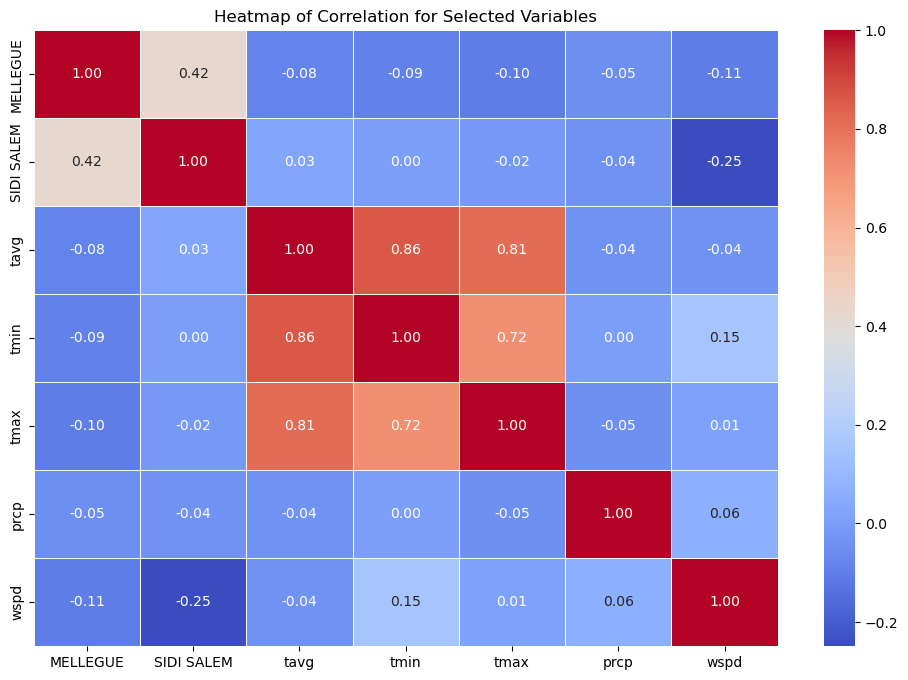

In [60]:
#Select a subset of columns for correlation analysis
columns_of_interest = ['MELLEGUE', 'SIDI SALEM', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd']
subset_corr_matrix = df_main[columns_of_interest].corr()

# Plot the heatmap with fewer variables
plt.figure(figsize=(12, 8))
sns.heatmap(subset_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Heatmap of Correlation for Selected Variables')
plt.show()


## Feature Selection and Data Splitting

In [63]:
# Check column names to verify the correct water level column
print(df_main.columns)

# Select features (X) and target variable (y)
X = df_main[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']]  # Example features
y = df_main['SILIANA']  # Using 'SILIANA' as the target variable due to the 0.697587 correlation

# Split data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Index(['date', 'MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA', 'SIDI SALEM',
       'BOU-HEURTMA', 'JOUMINE', 'GHEZALA', 'SEJNANE', 'S. EL BARRAK',
       'SILIANA', 'LAKHMESS', 'RMIL', 'BIR M'CHERGA', 'RMEL', 'NEBHANA',
       'SIDI SAAD', 'EL HAOUAREB', 'SIDI AÏCH', 'EL BREK', 'BEZIRK', 'CHIBA',
       'MASRI', 'LEBNA', 'HMA', 'ABID', 'Zarga', 'Ziatine', 'Year_x',
       'Month_x', 'Day_x', 'tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd',
       'pres', 'Year_y', 'Month_y', 'Day_y', 'average_water_level',
       'half_of_year'],
      dtype='object')


In [65]:
# Define the folder where the cleaned data should be stored
clean_data_path = '../data/clean'

# Create the directory if it does not exist
if not os.path.exists(clean_data_path):
    os.makedirs(clean_data_path)

# Define the path to save the cleaned data
merged_data_path = os.path.join(clean_data_path, 'main.csv')

# Check if the file already exists
if not os.path.exists(merged_data_path):
    # Save the cleaned data
    merged_data.to_csv(merged_data_path, index=False)
    print(f"Cleaned and merged data has been saved to: {merged_data_path}")
else:
    print(f"The file '{merged_data_path}' already exists. Saving will be skipped.")


The file '../data/clean/main.csv' already exists. Saving will be skipped.


In [67]:
#Handling NaN values: We filled NaNs with 0 to make the analysis consistent.
#Removing duplicates: We removed duplicate entries to avoid redundancy.
#Correct data types: Ensuring correct data types is crucial for accurate calculations, especially with date data.

In [69]:
#naming the new Data frame and saving it 

# Create the clean data directory if it doesn't exist
if not os.path.exists(clean_data_path):
    os.makedirs(clean_data_path)

# Define the path to save the main data
main_data_path = os.path.join(clean_data_path, 'main.csv')

# Rename the merged dataframe to df_main
df_main = merged_data

# Ensure df_main exists
if 'df_main' in globals():
    # Save the df_main DataFrame to the clean folder
    df_main.to_csv(main_data_path, index=False)
    print(f"Main data has been saved to: {main_data_path}")
else:
    print("Error: 'df_main' is not defined. Make sure the DataFrame was successfully created.")


Main data has been saved to: ../data/clean/main.csv


## Univariate Analysis: Distribution of Average Water Levels

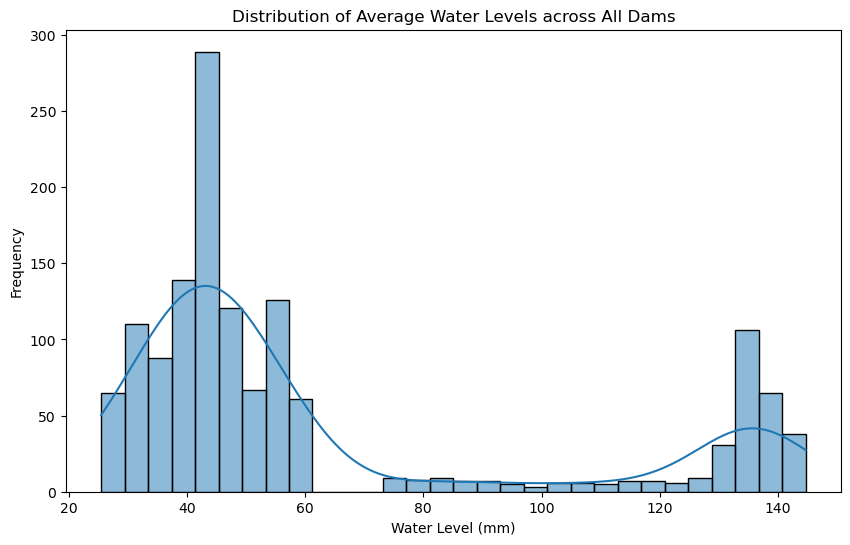

In [72]:
# Create a new column for the average water level across all dams
df_main['average_water_level'] = df_main[['MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA']].mean(axis=1)

# Univariate Analysis for the average water level
plt.figure(figsize=(10, 6))
sns.histplot(df_main['average_water_level'], kde=True, bins=30)
plt.title('Distribution of Average Water Levels across All Dams')
plt.xlabel('Water Level (mm)')
plt.ylabel('Frequency')
plt.show()


<Figure size 1000x600 with 0 Axes>

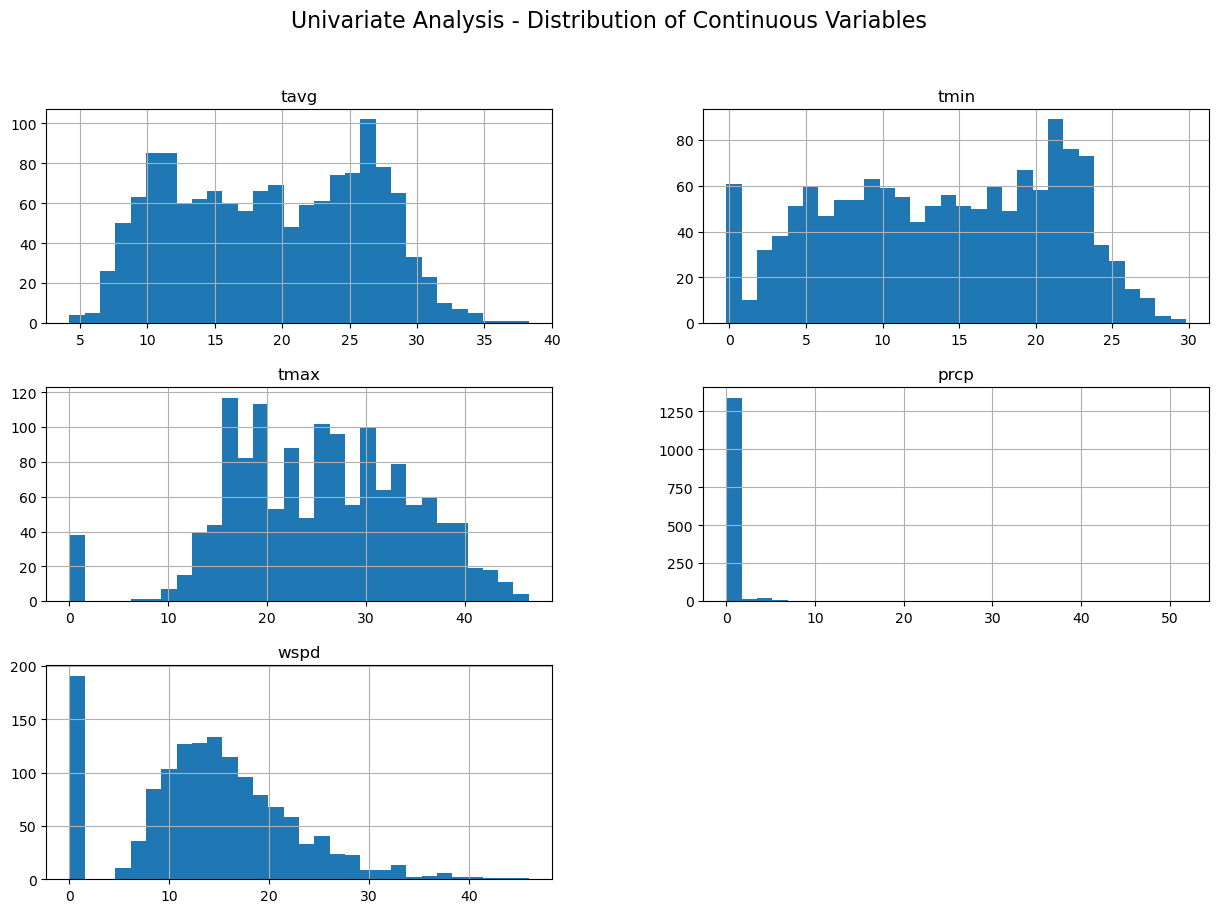

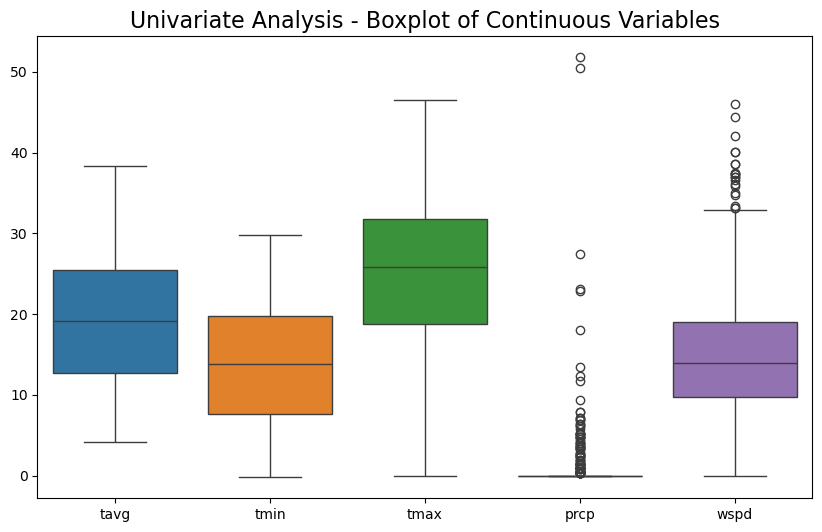

In [74]:
# Load your cleaned dataset
df = pd.read_csv('../../data/clean/cleaned_dataset_with_half_of_year.csv')

# Univariate Analysis: Histograms for continuous variables
plt.figure(figsize=(10, 6))
df[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']].hist(bins=30, figsize=(15, 10))
plt.suptitle("Univariate Analysis - Distribution of Continuous Variables", fontsize=16)
plt.show()

# Boxplots for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']])
plt.title("Univariate Analysis - Boxplot of Continuous Variables", fontsize=16)
plt.show()

## Bivariate Analysis: Check relationships between continuous variables and target

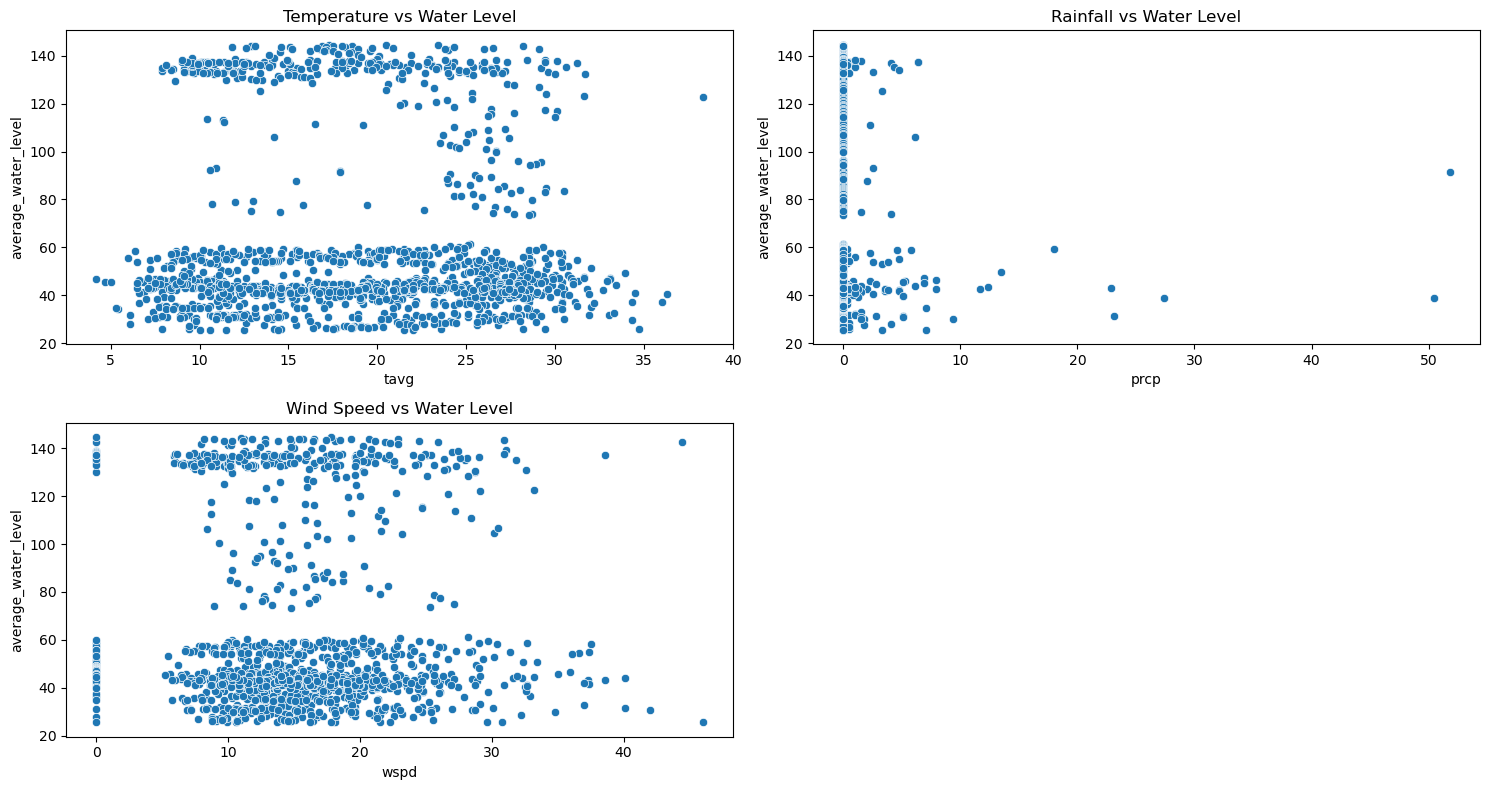

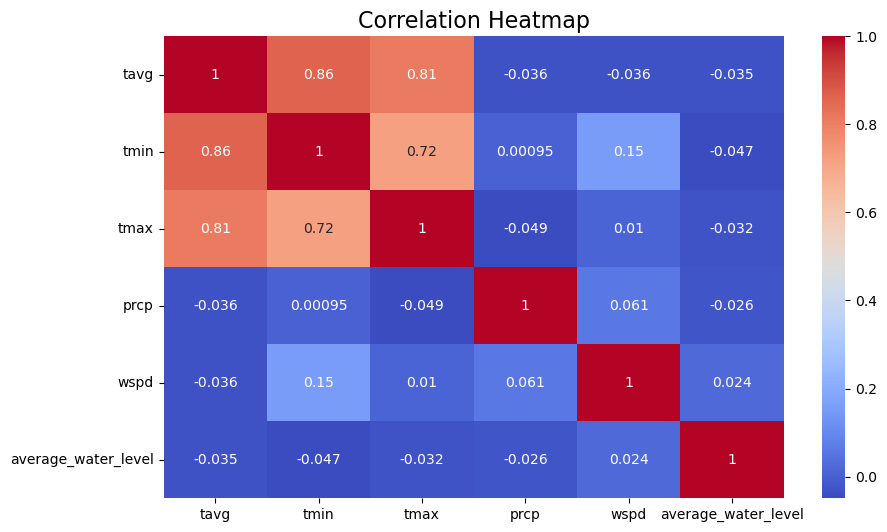

In [77]:
# Bivariate Analysis: Scatter plots to check relationships between continuous variables and target
plt.figure(figsize=(15, 8))

# Temperature vs. Water Level
plt.subplot(2, 2, 1)
sns.scatterplot(x='tavg', y='average_water_level', data=df)
plt.title("Temperature vs Water Level")

# Rainfall vs. Water Level
plt.subplot(2, 2, 2)
sns.scatterplot(x='prcp', y='average_water_level', data=df)
plt.title("Rainfall vs Water Level")

# Wind Speed vs. Water Level
plt.subplot(2, 2, 3)
sns.scatterplot(x='wspd', y='average_water_level', data=df)
plt.title("Wind Speed vs Water Level")

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'average_water_level']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


## Multivariate Analysis: Pairplot to show relationships between variables

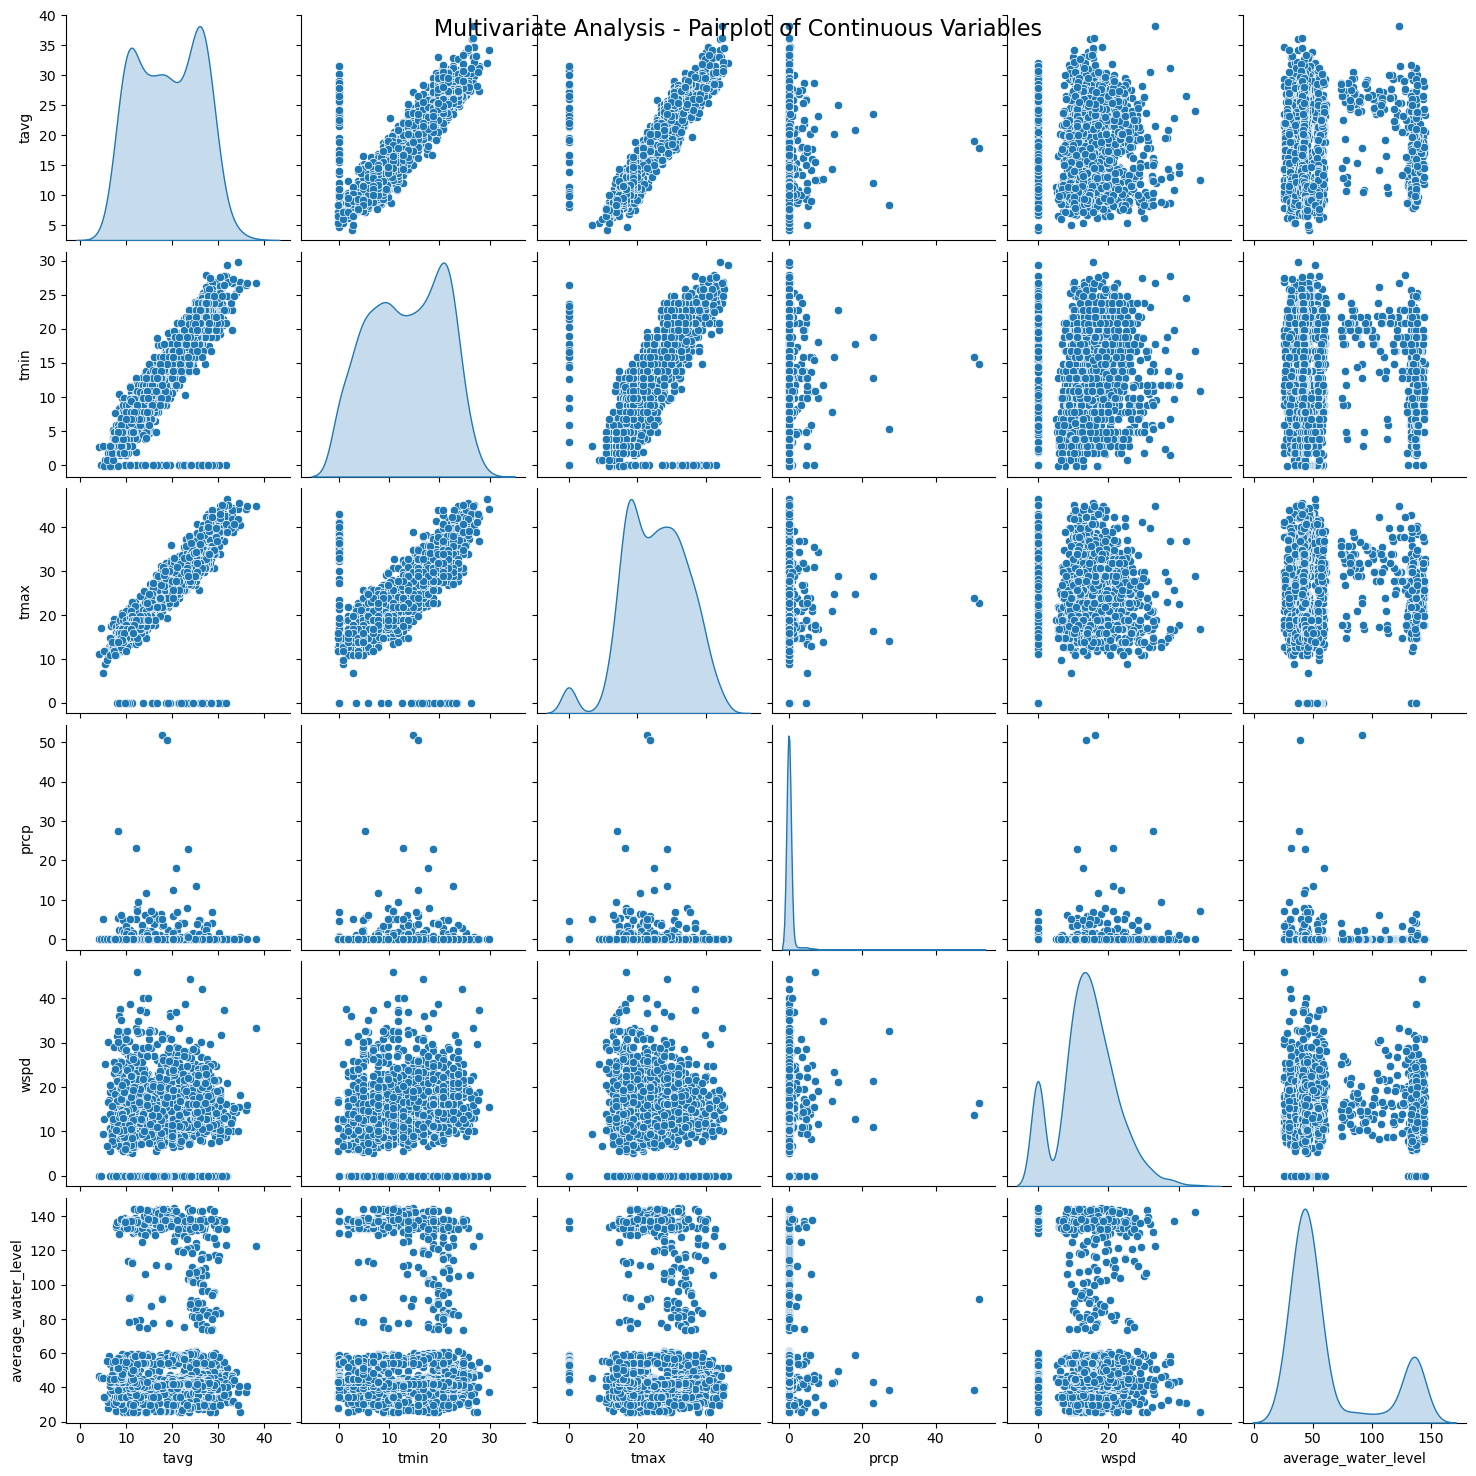

In [80]:
sns.pairplot(df[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'average_water_level']], diag_kind='kde')
plt.suptitle("Multivariate Analysis - Pairplot of Continuous Variables", fontsize=16)
plt.show()


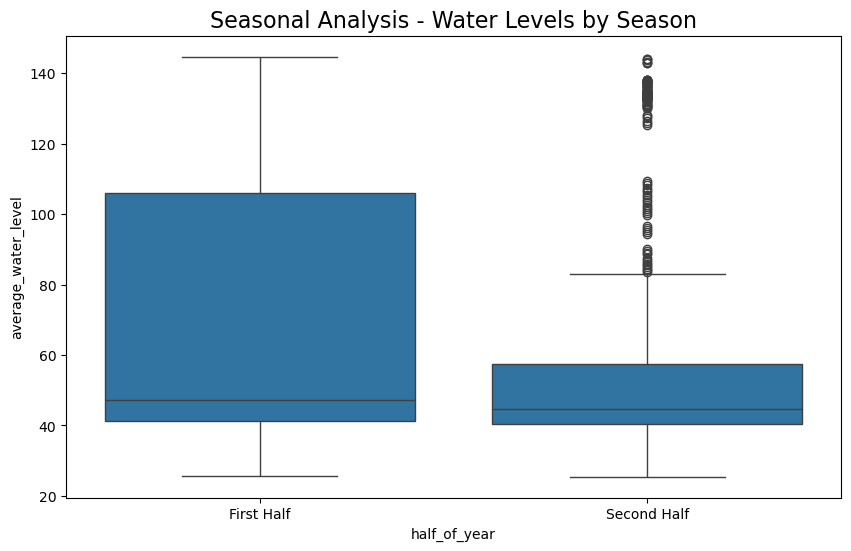

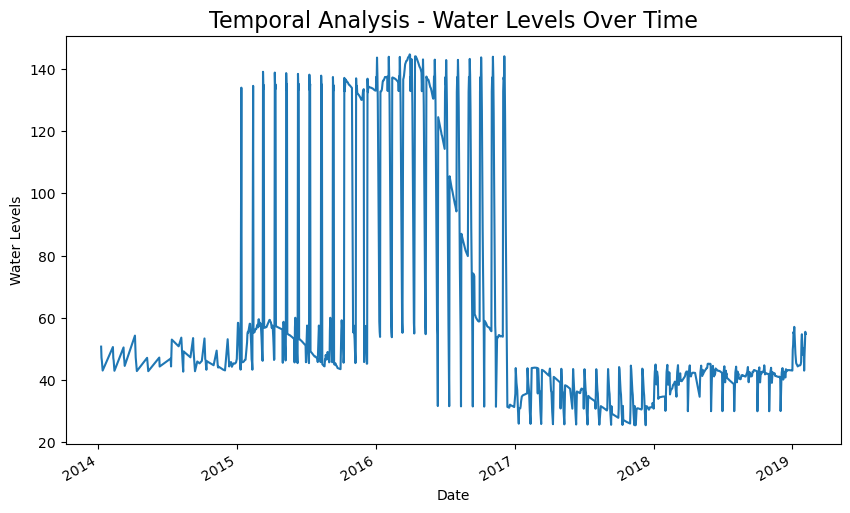

In [82]:
# Create a time-based index if not already done
df['date'] = pd.to_datetime(df['date'])

# Seasonal Analysis: Boxplot to show seasonal differences
plt.figure(figsize=(10, 6))
sns.boxplot(x='half_of_year', y='average_water_level', data=df)
plt.title("Seasonal Analysis - Water Levels by Season", fontsize=16)
plt.show()

# Temporal Analysis: Time series plot of water levels over time
plt.figure(figsize=(10, 6))
df.set_index('date')['average_water_level'].plot()
plt.title("Temporal Analysis - Water Levels Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Water Levels")
plt.show()


## Hypothesis Testing: Does Rainfall Affect Water Levels?

In [85]:
# Hypothesis testing: Does rainfall significantly affect water levels?
# Null hypothesis: Rainfall has no effect on water levels.
# Alternative hypothesis: Rainfall has a significant effect on water levels.

# Pearson correlation test
corr, p_value = stats.pearsonr(df['prcp'], df['average_water_level'])
print(f"Pearson correlation between rainfall and water levels: {corr}")
print(f"P-value: {p_value}")

# If p_value < 0.05, we reject the null hypothesis
if p_value < 0.05:
    print("We reject the null hypothesis. Rainfall has a significant effect on water levels.")
else:
    print("We fail to reject the null hypothesis. Rainfall does not have a significant effect on water levels.")


Pearson correlation between rainfall and water levels: -0.025816796981644463
P-value: 0.3344075210239059
We fail to reject the null hypothesis. Rainfall does not have a significant effect on water levels.


In [87]:
print(tunis_dams_rain_data_cleaned.columns)


Index(['date', 'MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA', 'SIDI SALEM',
       'BOU-HEURTMA', 'JOUMINE', 'GHEZALA', 'SEJNANE', 'S. EL BARRAK',
       'SILIANA', 'LAKHMESS', 'RMIL', 'BIR M'CHERGA', 'RMEL', 'NEBHANA',
       'SIDI SAAD', 'EL HAOUAREB', 'SIDI AÏCH', 'EL BREK', 'BEZIRK', 'CHIBA',
       'MASRI', 'LEBNA', 'HMA', 'ABID', 'Zarga', 'Ziatine'],
      dtype='object')


In [90]:
import pandas as pd
import os

# Use relative paths (relative to the location of this script)
weather_cleaned_path = '../data/clean/weather_cleaned.csv'
tunis_dams_rain_cleaned_path = '../data/clean/tunis_dams_rain_cleaned.csv'

# Load the datasets using pandas
weather_cleaned = pd.read_csv(weather_cleaned_path)
tunis_dams_rain_data_cleaned = pd.read_csv(tunis_dams_rain_cleaned_path)




In [92]:
# Set 'date' as the index for both DataFrames if not already set
if 'date' in tunis_dams_rain_data_cleaned.columns:
    tunis_dams_rain_data_cleaned.set_index('date', inplace=True)

if 'date' in weather_cleaned.columns:
    weather_cleaned.set_index('date', inplace=True)

# Check if 'date' index is in datetime format, and convert if necessary
if not pd.api.types.is_datetime64_any_dtype(tunis_dams_rain_data_cleaned.index):
    tunis_dams_rain_data_cleaned.index = pd.to_datetime(tunis_dams_rain_data_cleaned.index)

if not pd.api.types.is_datetime64_any_dtype(weather_cleaned.index):
    weather_cleaned.index = pd.to_datetime(weather_cleaned.index)

# Display the first few rows of the index to confirm conversion
print("\nFirst few 'date' values in tunis_dams_rain_data_cleaned index:")
print(tunis_dams_rain_data_cleaned.index[:5])

print("\nFirst few 'date' values in weather_cleaned index:")
print(weather_cleaned.index[:5])

# Proceed with further operations...
# Example: Creating new features
tunis_dams_rain_data_cleaned['month'] = tunis_dams_rain_data_cleaned.index.month
tunis_dams_rain_data_cleaned['season'] = tunis_dams_rain_data_cleaned['month'].apply(lambda x: 'First Half' if x <= 6 else 'Second Half')

# Creating lag features for water levels (example: MELLEGUE)
tunis_dams_rain_data_cleaned['lag_1'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(1)  # Lag by 1 day
tunis_dams_rain_data_cleaned['lag_7'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(7)  # Lag by 7 days (weekly effect)
tunis_dams_rain_data_cleaned['lag_30'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(30)  # Lag by 30 days (monthly effect)

# Drop any NaNs created by lagging
tunis_dams_rain_data_cleaned.dropna(inplace=True)

# Display the dataset to verify
print(tunis_dams_rain_data_cleaned.head())


First few 'date' values in tunis_dams_rain_data_cleaned index:
DatetimeIndex(['2014-01-08', '2014-01-09', '2014-01-10', '2014-01-12',
               '2014-02-08'],
              dtype='datetime64[ns]', name='date', freq=None)

First few 'date' values in weather_cleaned index:
DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05'],
              dtype='datetime64[ns]', name='date', freq=None)
            MELLEGUE  BEN METIR  KASSEB  BARBARA  SIDI SALEM  BOU-HEURTMA  \
date                                                                        
2014-07-19    28.918     49.780  68.860   61.775     477.385       75.458   
2014-07-20    28.749     49.669  68.738   61.656     475.200       75.072   
2014-07-21    28.547     49.557  68.656   61.617     473.014       74.821   
2014-07-22    28.344     49.446  68.533   61.538     470.828       74.569   
2014-07-23    28.175     49.335  68.411   61.459     468.662       74.380   

            JOUMINE

In [129]:
# Check for column names in both DataFrames
print(tunis_dams_rain_data_cleaned.columns)
print(weather_cleaned.columns)

# If 'date' exists, convert it to datetime
if 'date' in tunis_dams_rain_data_cleaned.columns:
    tunis_dams_rain_data_cleaned['date'] = pd.to_datetime(tunis_dams_rain_data_cleaned['date'])
else:
    print("The 'date' column is missing in tunis_dams_rain_data_cleaned")

if 'date' in weather_cleaned.columns:
    weather_cleaned['date'] = pd.to_datetime(weather_cleaned['date'])
else:
    print("The 'date' column is missing in weather_cleaned")

# Check the first few rows of 'date' if conversion was successful
if 'date' in tunis_dams_rain_data_cleaned.columns:
    print(tunis_dams_rain_data_cleaned['date'].head())

if 'date' in weather_cleaned.columns:
    print(weather_cleaned['date'].head())
    


Index(['MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA', 'SIDI SALEM',
       'BOU-HEURTMA', 'JOUMINE', 'GHEZALA', 'SEJNANE', 'S. EL BARRAK',
       'SILIANA', 'LAKHMESS', 'RMIL', 'BIR M'CHERGA', 'RMEL', 'NEBHANA',
       'SIDI SAAD', 'EL HAOUAREB', 'SIDI AÏCH', 'EL BREK', 'BEZIRK', 'CHIBA',
       'MASRI', 'LEBNA', 'HMA', 'ABID', 'Zarga', 'Ziatine', 'lag_1', 'lag_7',
       'lag_30'],
      dtype='object')
Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun'],
      dtype='object')
The 'date' column is missing in tunis_dams_rain_data_cleaned
The 'date' column is missing in weather_cleaned


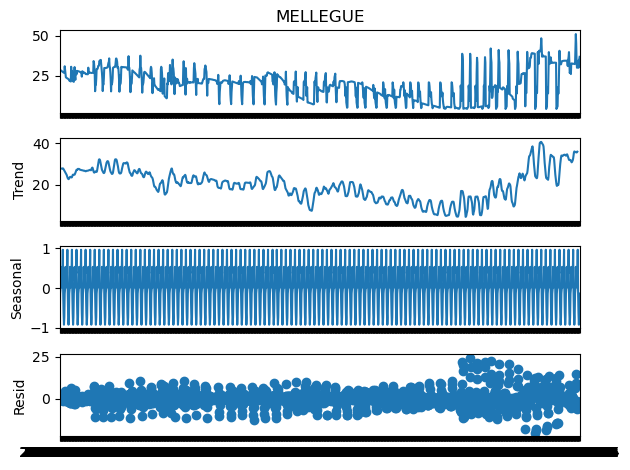

In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming 'MELLEGUE' is the correct water level column
result = seasonal_decompose(tunis_dams_rain_data_cleaned['MELLEGUE'], model='additive', period=12)

# Plot the decomposition
result.plot()
plt.show()


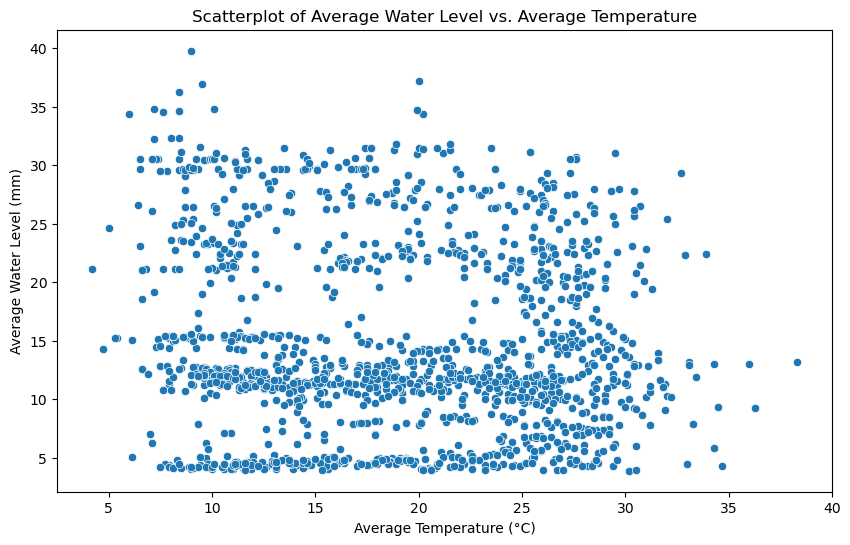

Correlation between average water level and temperature: -0.09712438259338212


In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (using relative paths as discussed earlier)
weather_cleaned_path = '../data/clean/weather_cleaned.csv'
tunis_dams_rain_cleaned_path = '../data/clean/tunis_dams_rain_cleaned.csv'

weather_cleaned = pd.read_csv(weather_cleaned_path)
tunis_dams_rain_data_cleaned = pd.read_csv(tunis_dams_rain_cleaned_path)

# Set 'date' as index
weather_cleaned.set_index('date', inplace=True)
tunis_dams_rain_data_cleaned.set_index('date', inplace=True)

# Ensure that 'date' is in datetime format
weather_cleaned.index = pd.to_datetime(weather_cleaned.index)
tunis_dams_rain_data_cleaned.index = pd.to_datetime(tunis_dams_rain_data_cleaned.index)

# Merge the datasets on the 'date' index to create df_main
df_main = weather_cleaned.merge(tunis_dams_rain_data_cleaned, left_index=True, right_index=True)

# Ensure that columns 'tavg' and 'average_water_level' exist in the merged DataFrame (df_main)
df_main['average_water_level'] = df_main[['MELLEGUE', 'SILIANA']].mean(axis=1)  # Example calculation
df_main['tavg'] = weather_cleaned['tavg']  # Ensure this column exists in the weather_cleaned data

# Bivariate Analysis: Scatterplot between average water level and average temperature (tavg)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tavg', y='average_water_level', data=df_main)
plt.title('Scatterplot of Average Water Level vs. Average Temperature')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Water Level (mm)')
plt.show()

# Calculate correlation between average water level and temperature
correlation = df_main['average_water_level'].corr(df_main['tavg'])
print(f'Correlation between average water level and temperature: {correlation}')


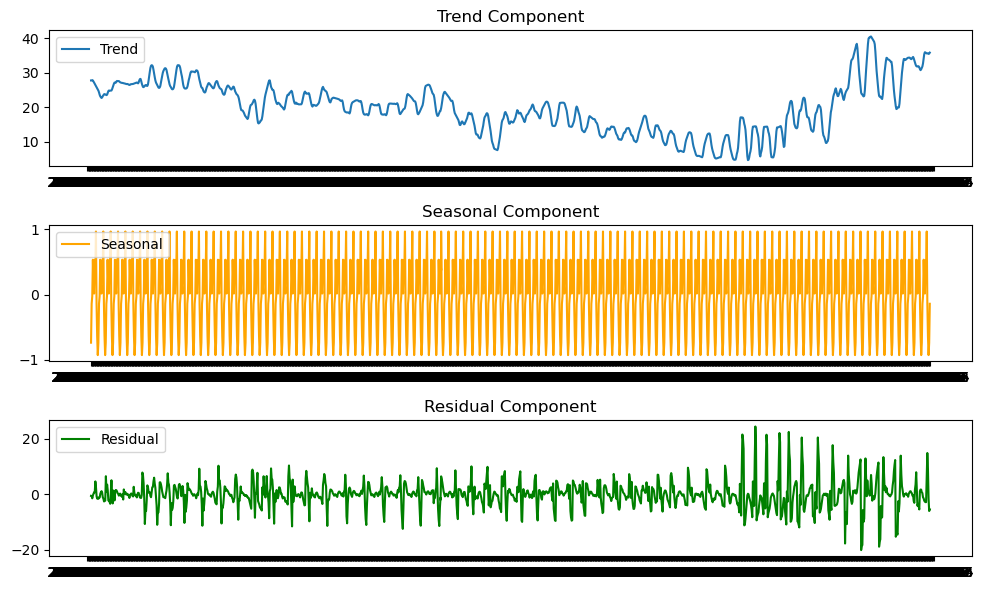

In [133]:
# Extract the trend, seasonal, and residual components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Visualize each component individually for better understanding
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(trend, label='Trend')
plt.title('Trend Component')
plt.legend(loc='upper left')

plt.subplot(3, 1, 2)
plt.plot(seasonal, label='Seasonal', color='orange')
plt.title('Seasonal Component')
plt.legend(loc='upper left')

plt.subplot(3, 1, 3)
plt.plot(residual, label='Residual', color='green')
plt.title('Residual Component')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [134]:
print(tunis_dams_rain_data_cleaned.columns)


Index(['MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA', 'SIDI SALEM',
       'BOU-HEURTMA', 'JOUMINE', 'GHEZALA', 'SEJNANE', 'S. EL BARRAK',
       'SILIANA', 'LAKHMESS', 'RMIL', 'BIR M'CHERGA', 'RMEL', 'NEBHANA',
       'SIDI SAAD', 'EL HAOUAREB', 'SIDI AÏCH', 'EL BREK', 'BEZIRK', 'CHIBA',
       'MASRI', 'LEBNA', 'HMA', 'ABID', 'Zarga', 'Ziatine'],
      dtype='object')


In [147]:

# No need to convert 'date' to datetime again since it's already the index.
# We can convert the index directly if necessary.
tunis_dams_rain_data_cleaned.index = pd.to_datetime(tunis_dams_rain_data_cleaned.index)

# Now create month and seasonal features from the datetime index
tunis_dams_rain_data_cleaned['month'] = tunis_dams_rain_data_cleaned.index.month
tunis_dams_rain_data_cleaned['season'] = tunis_dams_rain_data_cleaned['month'].apply(lambda x: 'First Half' if x <= 6 else 'Second Half')

# Creating lag features for water levels (example: MELLEGUE)
tunis_dams_rain_data_cleaned['lag_1'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(1)  # Lag by 1 day
tunis_dams_rain_data_cleaned['lag_7'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(7)  # Lag by 7 days (weekly effect)
tunis_dams_rain_data_cleaned['lag_30'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(30)  # Lag by 30 days (monthly effect)

# Drop any NaNs created by lagging
tunis_dams_rain_data_cleaned.dropna(inplace=True)

# Display the dataset to verify
display(tunis_dams_rain_data_cleaned.head())


,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,S. EL BARRAK,...,LEBNA,HMA,ABID,Zarga,Ziatine,month,season,lag_1,lag_7,lag_30
date,,,,,,,,,,,,,,,,,,,,,
2014-09-07,30.676,51.165,69.965,62.249,497.802,79.027,91.659,8.565,96.169,277.761,...,11.427,1.730,5.290,17.386471,24.297374,9,Second Half,21.456,22.898,28.918
2014-09-08,24.930,47.299,66.604,60.172,432.536,68.873,81.802,7.679,86.360,272.027,...,9.272,1.563,4.377,17.386471,24.297374,9,Second Half,30.676,22.729,28.749
2014-09-10,28.141,39.573,60.573,57.614,377.814,54.131,64.493,6.560,66.806,259.819,...,7.074,1.398,2.842,17.386471,24.297374,9,Second Half,24.930,22.022,28.547
2014-09-12,25.538,32.680,55.249,57.985,341.015,44.930,51.724,5.929,50.300,260.979,...,12.612,1.196,4.680,17.386471,24.297374,9,Second Half,28.141,21.880,28.344
2014-09-18,21.824,41.980,62.466,57.725,376.396,58.395,69.569,6.835,74.835,260.689,...,7.494,1.455,2.999,17.386471,24.297374,9,Second Half,25.538,21.739,28.175


In [149]:
print("Available columns:", tunis_dams_rain_data_cleaned.columns)


Available columns: Index(['MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA', 'SIDI SALEM',
       'BOU-HEURTMA', 'JOUMINE', 'GHEZALA', 'SEJNANE', 'S. EL BARRAK',
       'SILIANA', 'LAKHMESS', 'RMIL', 'BIR M'CHERGA', 'RMEL', 'NEBHANA',
       'SIDI SAAD', 'EL HAOUAREB', 'SIDI AÏCH', 'EL BREK', 'BEZIRK', 'CHIBA',
       'MASRI', 'LEBNA', 'HMA', 'ABID', 'Zarga', 'Ziatine', 'month', 'season',
       'lag_1', 'lag_7', 'lag_30'],
      dtype='object')


In [151]:
# Check the available columns to ensure 'date' exists
print("Available columns:", tunis_dams_rain_data_cleaned.columns)

# If 'date' column exists, proceed with the transformation
if 'date' in tunis_dams_rain_data_cleaned.columns:
    # Make a copy of the dataset for manipulation
    cleaned_dataset_with_half_of_year = tunis_dams_rain_data_cleaned.copy()

    # Convert the 'date' column to datetime format
    cleaned_dataset_with_half_of_year['date'] = pd.to_datetime(cleaned_dataset_with_half_of_year['date'])

    # Set 'date' as the index
    cleaned_dataset_with_half_of_year.set_index('date', inplace=True)

    # Create year, month, day features from the 'date' column
    cleaned_dataset_with_half_of_year['Year'] = cleaned_dataset_with_half_of_year.index.year
    cleaned_dataset_with_half_of_year['Month'] = cleaned_dataset_with_half_of_year.index.month
    cleaned_dataset_with_half_of_year['Day'] = cleaned_dataset_with_half_of_year.index.day

    # Display the updated dataset
    print(cleaned_dataset_with_half_of_year.head())

else:
    print("The dataset does not contain a 'date' column.")


Available columns: Index(['MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA', 'SIDI SALEM',
       'BOU-HEURTMA', 'JOUMINE', 'GHEZALA', 'SEJNANE', 'S. EL BARRAK',
       'SILIANA', 'LAKHMESS', 'RMIL', 'BIR M'CHERGA', 'RMEL', 'NEBHANA',
       'SIDI SAAD', 'EL HAOUAREB', 'SIDI AÏCH', 'EL BREK', 'BEZIRK', 'CHIBA',
       'MASRI', 'LEBNA', 'HMA', 'ABID', 'Zarga', 'Ziatine', 'month', 'season',
       'lag_1', 'lag_7', 'lag_30'],
      dtype='object')
The dataset does not contain a 'date' column.


In [153]:
weather_cleaned_path = '../data/clean/weather_cleaned.csv'
tunis_dams_rain_cleaned_path = '../data/clean/tunis_dams_rain_cleaned.csv'

# Load datasets
weather_cleaned = pd.read_csv(weather_cleaned_path)
tunis_dams_rain_data_cleaned = pd.read_csv(tunis_dams_rain_cleaned_path)

# Ensure date is the index
weather_cleaned.set_index('date', inplace=True)
tunis_dams_rain_data_cleaned.set_index('date', inplace=True)

# Merge datasets on date (as an example, adjust this part based on your actual workflow)
cleaned_dataset_with_half_of_year = weather_cleaned.merge(tunis_dams_rain_data_cleaned, left_index=True, right_index=True)

# Now proceed with your code
# Reset the index to make 'date' a regular column again
cleaned_dataset_with_half_of_year.reset_index(inplace=True)

# Move 'date' column to the first position (left side)
cols = cleaned_dataset_with_half_of_year.columns.tolist()
cols.insert(0, cols.pop(cols.index('date')))
cleaned_dataset_with_half_of_year = cleaned_dataset_with_half_of_year[cols]

# Display the dataset with 'date' at the left side
print(cleaned_dataset_with_half_of_year.head())

         date  tavg       tmin  tmax  prcp  snow        wdir       wspd  wpgt  \
0  2014-01-08   9.5  13.759926  17.5   0.0   NaN  147.866142  16.403548   NaN   
1  2014-01-09   9.9   7.900000  17.1   0.0   NaN  213.000000  10.700000   NaN   
2  2014-01-10  10.7   6.800000  17.6   0.0   NaN  147.866142   8.300000   NaN   
3  2014-01-12  12.1  10.100000  18.3   0.0   NaN  147.866142  16.403548   NaN   
4  2014-02-08  13.1  10.800000  19.1   0.0   NaN   66.000000  16.400000   NaN   

          pres  ...  SIDI AÏCH  EL BREK  BEZIRK  CHIBA  MASRI   LEBNA    HMA  \
0  1016.178487  ...      0.201      2.4   3.255  0.293  2.822   9.820  1.604   
1  1016.178487  ...      0.201      2.4   2.201  0.134  1.549   8.170  1.491   
2  1016.178487  ...      0.201      2.4   1.590  0.140  0.924   7.100  1.413   
3  1016.178487  ...      0.201      2.4   0.998  1.116  1.882  12.562  1.209   
4  1016.178487  ...      0.201      2.4   3.215  0.285  2.770   9.735  1.599   

    ABID      Zarga    Ziatine  

In [155]:
# Verify if 'date' exists and convert it to datetime
if 'date' in cleaned_dataset_with_half_of_year.columns:
    cleaned_dataset_with_half_of_year['date'] = pd.to_datetime(cleaned_dataset_with_half_of_year['date'])
    print("Date column converted successfully.")
else:
    print("Error: 'date' column not found.")

# Ensure that the 'X' DataFrame is properly defined
# Assuming 'X' is derived from the cleaned_dataset_with_half_of_year DataFrame
X = cleaned_dataset_with_half_of_year.drop(columns=['MELLEGUE'])  # Drop target column from features

# Create year, month, and day features from the 'date' column
X['Year'] = cleaned_dataset_with_half_of_year['date'].dt.year
X['Month'] = cleaned_dataset_with_half_of_year['date'].dt.month
X['Day'] = cleaned_dataset_with_half_of_year['date'].dt.day

# Display the first few rows to verify
print(X.head())


Date column converted successfully.
        date  tavg       tmin  tmax  prcp  snow        wdir       wspd  wpgt  \
0 2014-01-08   9.5  13.759926  17.5   0.0   NaN  147.866142  16.403548   NaN   
1 2014-01-09   9.9   7.900000  17.1   0.0   NaN  213.000000  10.700000   NaN   
2 2014-01-10  10.7   6.800000  17.6   0.0   NaN  147.866142   8.300000   NaN   
3 2014-01-12  12.1  10.100000  18.3   0.0   NaN  147.866142  16.403548   NaN   
4 2014-02-08  13.1  10.800000  19.1   0.0   NaN   66.000000  16.400000   NaN   

          pres  ...  CHIBA  MASRI   LEBNA    HMA   ABID      Zarga    Ziatine  \
0  1016.178487  ...  0.293  2.822   9.820  1.604  4.608  17.386471  24.297374   
1  1016.178487  ...  0.134  1.549   8.170  1.491  3.558  17.386471  24.297374   
2  1016.178487  ...  0.140  0.924   7.100  1.413  2.789  17.386471  24.297374   
3  1016.178487  ...  1.116  1.882  12.562  1.209  4.705  17.386471  24.297374   
4  1016.178487  ...  0.285  2.770   9.735  1.599  4.584  17.386471  24.297374 

In [157]:
# One-hot encoding for categorical columns
X = pd.get_dummies(X, drop_first=True)

# Check the resulting features after encoding
print(X.head())


        date  tavg       tmin  tmax  prcp  snow        wdir       wspd  wpgt  \
0 2014-01-08   9.5  13.759926  17.5   0.0   NaN  147.866142  16.403548   NaN   
1 2014-01-09   9.9   7.900000  17.1   0.0   NaN  213.000000  10.700000   NaN   
2 2014-01-10  10.7   6.800000  17.6   0.0   NaN  147.866142   8.300000   NaN   
3 2014-01-12  12.1  10.100000  18.3   0.0   NaN  147.866142  16.403548   NaN   
4 2014-02-08  13.1  10.800000  19.1   0.0   NaN   66.000000  16.400000   NaN   

          pres  ...  CHIBA  MASRI   LEBNA    HMA   ABID      Zarga    Ziatine  \
0  1016.178487  ...  0.293  2.822   9.820  1.604  4.608  17.386471  24.297374   
1  1016.178487  ...  0.134  1.549   8.170  1.491  3.558  17.386471  24.297374   
2  1016.178487  ...  0.140  0.924   7.100  1.413  2.789  17.386471  24.297374   
3  1016.178487  ...  1.116  1.882  12.562  1.209  4.705  17.386471  24.297374   
4  1016.178487  ...  0.285  2.770   9.735  1.599  4.584  17.386471  24.297374   

   Year  Month  Day  
0  2014   

In [159]:
# Assuming tunis_dams_rain_data_cleaned already exists and has the 'MELLEGUE' column

# Creating lag features for water levels
tunis_dams_rain_data_cleaned['lag_1'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(1)  # Lag by 1 day
tunis_dams_rain_data_cleaned['lag_7'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(7)  # Lag by 7 days
tunis_dams_rain_data_cleaned['lag_30'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(30)  # Lag by 30 days

# Drop NaN rows created by lagging
tunis_dams_rain_data_cleaned.dropna(inplace=True)

# Define X (features) and y (target)
X = tunis_dams_rain_data_cleaned[['lag_1', 'lag_7', 'lag_30', 'SILIANA', 'RMIL', 'ABID', 'CHIBA']]  # Example features
y = tunis_dams_rain_data_cleaned['MELLEGUE']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest R²: 0.9823463269449234
Random Forest RMSE: 1.1524774624626306


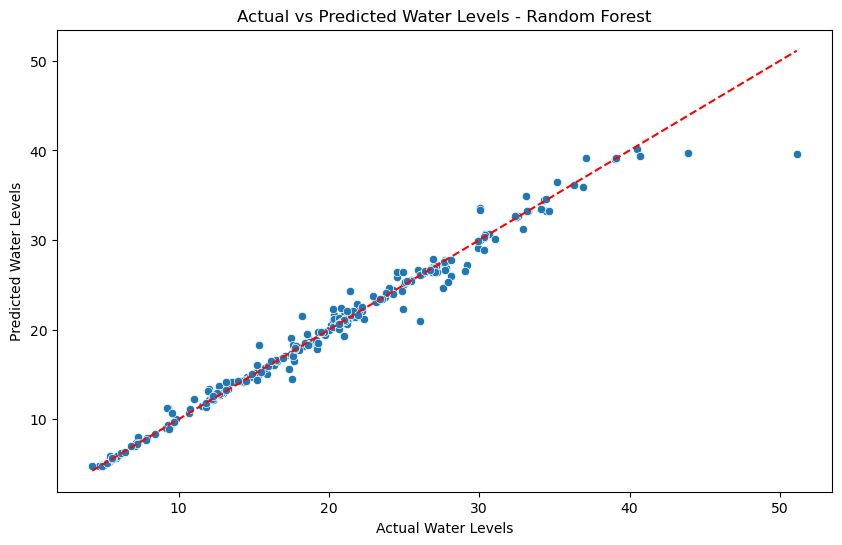

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot predicted vs actual
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.title('Actual vs Predicted Water Levels - Random Forest')
plt.show()


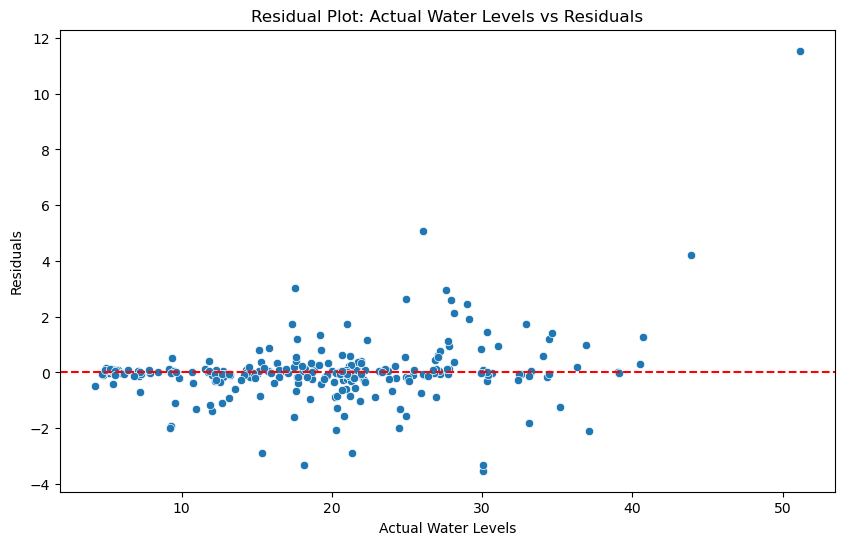

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred_rf

# Create a scatter plot of residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot: Actual Water Levels vs Residuals')
plt.xlabel('Actual Water Levels')
plt.ylabel('Residuals')
plt.show()


Random Forest R²: 0.9823463269449234
Random Forest RMSE: 1.1524774624626306


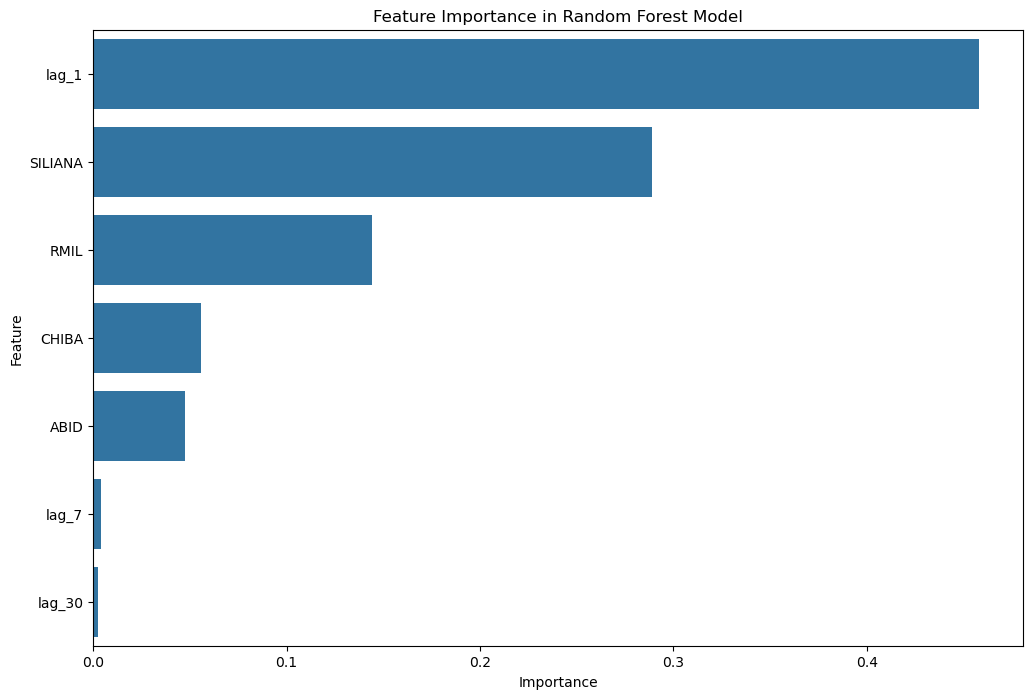

In [165]:
# Defining X (features) and y (target)
# Including the relevant features, such as lag_1, lag_7, and others
X = tunis_dams_rain_data_cleaned[['lag_1', 'lag_7', 'lag_30', 'SILIANA', 'RMIL', 'ABID', 'CHIBA']]  # Add more relevant features here
y = tunis_dams_rain_data_cleaned['MELLEGUE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# Extract feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to hold the feature names and their corresponding importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()


In [167]:
from sklearn.metrics import mean_absolute_error

# Defining X (features) and y (target)
# Including the relevant features, such as lag_1, lag_7, and others
X = tunis_dams_rain_data_cleaned[['lag_1', 'lag_7', 'lag_30', 'SILIANA', 'RMIL', 'ABID', 'CHIBA']]  # Add more relevant features here
y = tunis_dams_rain_data_cleaned['MELLEGUE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae}")

# Extract feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to hold the feature names and their corresponding importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


Random Forest R²: 0.9823463269449234
Random Forest RMSE: 1.1524774624626306
Random Forest MAE: 0.5323152919708021


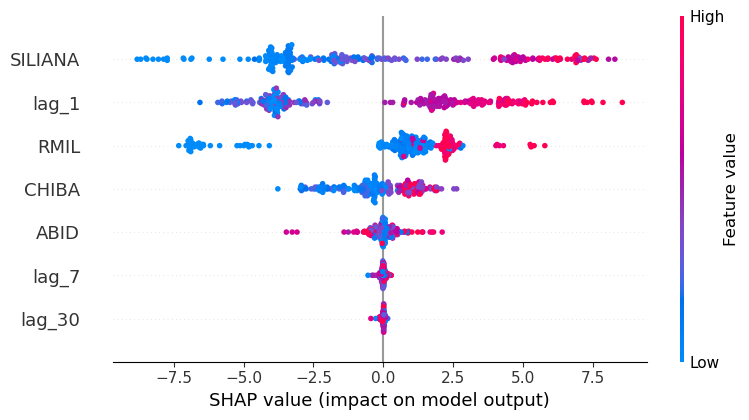

In [174]:
import shap
shap.initjs()

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Initialize SHAP explainer for Random Forest
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test)

# If you want a more detailed view, you can plot individual feature impacts for a single prediction
# Example: SHAP force plot for a specific prediction
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features (X) and target variable (y)
X = df_main[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']]  # Example features
y = df_main['SILIANA']  # Using 'SILIANA' as the target variable

# Split data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 65.40001605877667
R-squared (R²): 0.04394384527703976


In [183]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import os

# Relative path to the main.csv file (adjust this based on where your script is located)
main_csv_path = '../data/clean/main.csv'

# Load the dataset using pandas
df_main = pd.read_csv(main_csv_path)

# Convert the 'date' column to datetime format
df_main['date'] = pd.to_datetime(df_main['date'])

# Function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Create a new 'season' column
df_main['season'] = df_main['date'].dt.month.apply(get_season)

# One-hot encode the 'season' column
df_main = pd.get_dummies(df_main, columns=['season'], drop_first=True)

# Check the data
print(df_main.head())

# Redefine X (features) to include the new season features
X = df_main[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'season_Spring', 'season_Summer', 'season_Winter']]

# Redefine y (target)
y = df_main['SILIANA']

# Train-test split and model training as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


   MELLEGUE  BEN METIR  KASSEB  BARBARA  SIDI SALEM  BOU-HEURTMA  JOUMINE  \
0    26.721     48.091  67.485   60.787     448.591       71.317   84.411   
1    21.315     44.527  64.278   58.725     400.528       62.800   74.739   
2    26.113     40.278  61.178   57.022     360.543       54.719   66.061   
3    25.978     33.311  55.713   57.318     346.387       46.205   53.778   
4    26.519     47.955  67.405   60.708     446.569       71.011   84.088   

   GHEZALA  SEJNANE  S. EL BARRAK  ...  snow        wdir       wspd  wpgt  \
0    7.883   89.022       273.385  ...   NaN  147.866142  16.403548   NaN   
1    7.221   79.611       264.751  ...   NaN  213.000000  10.700000   NaN   
2    6.586   69.456       259.239  ...   NaN  147.866142   8.300000   NaN   
3    5.995   51.276       255.256  ...   NaN  147.866142  16.403548   NaN   
4    7.854   88.667       273.234  ...   NaN   66.000000  16.400000   NaN   

          pres  tsun  average_water_level  season_Spring  season_Summer  \

In [185]:
#Handle Missing Values

In [187]:
# Ensure the 'date' column is in datetime format if it's not already
df_main['date'] = pd.to_datetime(df_main['date'])

# Extract the month from the 'date' column
df_main['month'] = df_main['date'].dt.month

# Reset index to avoid conflict with 'month' as both index and column
df_main = df_main.reset_index(drop=True)

# Fill NaN values with the mean value of the corresponding month
# Exclude the 'month' column from the filling operation
df_main.update(df_main.groupby('month').transform(lambda x: x.fillna(x.mean())))

# Check for columns that still have NaN values
cols_with_nan = df_main.columns[df_main.isnull().any()].tolist()

# Drop columns that still contain NaN values
df_main.drop(columns=cols_with_nan, inplace=True)

# Drop the 'month' column if it's no longer needed
df_main.drop(columns=['month'], inplace=True)

# Display the updated dataframe
print(df_main.head())


   MELLEGUE  BEN METIR  KASSEB  BARBARA  SIDI SALEM  BOU-HEURTMA  JOUMINE  \
0    26.721     48.091  67.485   60.787     448.591       71.317   84.411   
1    21.315     44.527  64.278   58.725     400.528       62.800   74.739   
2    26.113     40.278  61.178   57.022     360.543       54.719   66.061   
3    25.978     33.311  55.713   57.318     346.387       46.205   53.778   
4    26.519     47.955  67.405   60.708     446.569       71.011   84.088   

   GHEZALA  SEJNANE  S. EL BARRAK  ...       tmin  tmax  prcp        wdir  \
0    7.883   89.022       273.385  ...  13.759926  17.5   0.0  147.866142   
1    7.221   79.611       264.751  ...   7.900000  17.1   0.0  213.000000   
2    6.586   69.456       259.239  ...   6.800000  17.6   0.0  147.866142   
3    5.995   51.276       255.256  ...  10.100000  18.3   0.0  147.866142   
4    7.854   88.667       273.234  ...  10.800000  19.1   0.0   66.000000   

        wspd         pres  average_water_level  season_Spring  season_Summ

In [189]:
# Step 1: Define target (y) and features (X)
X = df_main[['tavg', 'tmin', 'tmax', 'prcp', 'wspd']]  # Example features
y = df_main['MELLEGUE']  # Target variable: MELLEGUE water level

# Step 2: Split the data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 3: Initialize the model
model = LinearRegression()

# Step 4: Train the model on the training data
model.fit(X_train, y_train)

# Step 5: Make predictions on the test data
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 7: Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 79.14148739550663
R-squared (R²): 0.017910318412465487


In [193]:
# Create a new column to categorize into the first half and second half of the year
df_main['half_of_year'] = df_main['date'].dt.month.apply(lambda x: 'First Half' if x <= 6 else 'Second Half')

# Check the first few rows to verify the 'half_of_year' feature
df_main[['date', 'half_of_year']].head()


,date,half_of_year
0,2014-01-08,First Half
1,2014-01-09,First Half
2,2014-01-10,First Half
3,2014-01-12,First Half
4,2014-02-08,First Half


In [195]:
import os

# Define the relative path to the 'clean' directory and the file path
clean_dir = '../../data/clean'
file_path = f'{clean_dir}/cleaned_dataset_with_half_of_year.csv'

# Step 1: Check if the directory exists, if not, create it
if not os.path.exists(clean_dir):
    os.makedirs(clean_dir)
    print(f"Directory '{clean_dir}' created.")

# Step 2: Check if the file already exists, if not, create the new dataset with 'half_of_year' and save it
if not os.path.isfile(file_path):
    # Assuming df_main exists and contains your main data
    # Add the 'half_of_year' feature based on the 'date' column
    df_main['half_of_year'] = df_main['date'].apply(lambda x: 'First Half' if x.month <= 6 else 'Second Half')

    # Save the dataset with the 'half_of_year' feature to the clean directory
    df_main.to_csv(file_path, index=False)
    print(f"Dataset saved with 'half_of_year' feature at '{file_path}'.")
else:
    print(f"File '{file_path}' already exists, not overwriting.")



File '../../data/clean/cleaned_dataset_with_half_of_year.csv' already exists, not overwriting.


In [197]:
from sklearn.preprocessing import PolynomialFeatures

# Select the numerical features that could benefit from interaction and polynomial terms
selected_features = df_main[['tavg', 'wspd', 'pres']]

# Initialize PolynomialFeatures (degree=2 creates square and interaction terms)
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the selected features
poly_features = poly.fit_transform(selected_features)

# Automatically get feature names after fitting
poly_feature_names = poly.get_feature_names_out()

# Create a new DataFrame for the polynomial features
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)

# Concatenate the polynomial features with the original dataframe
df_main = pd.concat([df_main, poly_df], axis=1)

# Display the new columns to ensure that the polynomial features are added
print(df_main.columns)


Index(['MELLEGUE', 'BEN METIR', 'KASSEB', 'BARBARA', 'SIDI SALEM',
       'BOU-HEURTMA', 'JOUMINE', 'GHEZALA', 'SEJNANE', 'S. EL BARRAK',
       'SILIANA', 'LAKHMESS', 'RMIL', 'BIR M'CHERGA', 'RMEL', 'NEBHANA',
       'SIDI SAAD', 'EL HAOUAREB', 'SIDI AÏCH', 'EL BREK', 'BEZIRK', 'CHIBA',
       'MASRI', 'LEBNA', 'HMA', 'ABID', 'Zarga', 'Ziatine', 'date', 'tavg',
       'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'pres', 'average_water_level',
       'season_Spring', 'season_Summer', 'season_Winter', 'half_of_year',
       'tavg', 'wspd', 'pres', 'tavg^2', 'tavg wspd', 'tavg pres', 'wspd^2',
       'wspd pres', 'pres^2'],
      dtype='object')


In [199]:
# Display the first few rows with the new polynomial features
df_main[poly_feature_names].head()


,tavg,tavg,wspd,wspd,pres,pres,tavg^2,tavg wspd,tavg pres,wspd^2,wspd pres,pres^2
0,9.5,9.5,16.403548,16.403548,1016.178487,1016.178487,90.25,155.833704,9653.695629,269.076381,16668.932394,1.032619e+06
1,9.9,9.9,10.700000,10.700000,1016.178487,1016.178487,98.01,105.930000,10060.167024,114.490000,10873.109813,1.032619e+06
2,10.7,10.7,8.300000,8.300000,1016.178487,1016.178487,114.49,88.810000,10873.109813,68.890000,8434.281444,1.032619e+06
3,12.1,12.1,16.403548,16.403548,1016.178487,1016.178487,146.41,198.482928,12295.759695,269.076381,16668.932394,1.032619e+06
4,13.1,13.1,16.400000,16.400000,1016.178487,1016.178487,171.61,214.840000,13311.938183,268.960000,16665.327191,1.032619e+06


In [201]:
# Drop duplicate columns
df_main = df_main.loc[:, ~df_main.columns.duplicated()]

# Display the cleaned dataframe
df_main.head()


,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,S. EL BARRAK,...,season_Spring,season_Summer,season_Winter,half_of_year,tavg^2,tavg wspd,tavg pres,wspd^2,wspd pres,pres^2
0,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,273.385,...,False,False,True,First Half,90.25,155.833704,9653.695629,269.076381,16668.932394,1.032619e+06
1,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,264.751,...,False,False,True,First Half,98.01,105.930000,10060.167024,114.490000,10873.109813,1.032619e+06
2,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,259.239,...,False,False,True,First Half,114.49,88.810000,10873.109813,68.890000,8434.281444,1.032619e+06
3,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,255.256,...,False,False,True,First Half,146.41,198.482928,12295.759695,269.076381,16668.932394,1.032619e+06
4,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,273.234,...,False,False,True,First Half,171.61,214.840000,13311.938183,268.960000,16665.327191,1.032619e+06


In [203]:
# Drop duplicate columns
df_main = df_main.loc[:, ~df_main.columns.duplicated()]

# Display the cleaned dataframe
df_main.head()


,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,S. EL BARRAK,...,season_Spring,season_Summer,season_Winter,half_of_year,tavg^2,tavg wspd,tavg pres,wspd^2,wspd pres,pres^2
0,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,273.385,...,False,False,True,First Half,90.25,155.833704,9653.695629,269.076381,16668.932394,1.032619e+06
1,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,264.751,...,False,False,True,First Half,98.01,105.930000,10060.167024,114.490000,10873.109813,1.032619e+06
2,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,259.239,...,False,False,True,First Half,114.49,88.810000,10873.109813,68.890000,8434.281444,1.032619e+06
3,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,255.256,...,False,False,True,First Half,146.41,198.482928,12295.759695,269.076381,16668.932394,1.032619e+06
4,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,273.234,...,False,False,True,First Half,171.61,214.840000,13311.938183,268.960000,16665.327191,1.032619e+06


In [205]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Select relevant features and target for the model
X = df_main[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'season_Spring', 'season_Summer', 'season_Winter', 'wspd pres', 'pres^2']]
y = df_main['SILIANA']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the 'alpha' value to control regularization strength

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")


Mean Squared Error (MSE): 65.29523326202252
R-squared (R²): 0.04547562223648072


In [207]:
df_main['tavg_prcp_interaction'] = df_main['tavg'] * df_main['prcp']
df_main['tavg_wspd_interaction'] = df_main['tavg'] * df_main['wspd']


In [209]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X)


In [211]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)


tavg             0.206727
tmax             0.166578
tmin             0.158525
wspd pres        0.155469
pres^2           0.149635
wspd             0.088828
prcp             0.036376
season_Spring    0.022455
season_Winter    0.007728
season_Summer    0.007680
dtype: float64


In [213]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0]}
grid_search = GridSearchCV(Ridge(), param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
print("Best alpha for Ridge Regression:", best_alpha)


Best alpha for Ridge Regression: 1000.0


In [215]:


# Initialize the Ridge Regression model with the best alpha value
ridge_model = Ridge(alpha=100.0)

# Train the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display evaluation metrics
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"R-squared (R²): {r2_ridge}")


Mean Squared Error (MSE): 64.97745390393838
R-squared (R²): 0.05012110903371947


In [217]:

# Create interaction features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Generate new feature names
poly_feature_names = poly.get_feature_names_out(X.columns)

# Convert the new features to a DataFrame
X_train_poly = pd.DataFrame(X_poly, columns=poly_feature_names)

# Do the same for the test set
X_test_poly = poly.transform(X_test)
X_test_poly = pd.DataFrame(X_test_poly, columns=poly_feature_names)


In [219]:
from scipy import stats

# Select only the numeric columns
numeric_cols = df_main.select_dtypes(include=[np.number])

# Calculate Z-scores for numeric columns to identify outliers (Threshold = 3)
z_scores = stats.zscore(numeric_cols)

# Find rows where any column's Z-score is greater than 3 (or less than -3) to detect outliers
outliers = (abs(z_scores) > 3).any(axis=1)

# Remove the outliers from the data
df_cleaned = df_main[~outliers]

# Display the cleaned dataset
print(df_cleaned.head())


   MELLEGUE  BEN METIR  KASSEB  BARBARA  SIDI SALEM  BOU-HEURTMA  JOUMINE  \
0    26.721     48.091  67.485   60.787     448.591       71.317   84.411   
1    21.315     44.527  64.278   58.725     400.528       62.800   74.739   
2    26.113     40.278  61.178   57.022     360.543       54.719   66.061   
3    25.978     33.311  55.713   57.318     346.387       46.205   53.778   
4    26.519     47.955  67.405   60.708     446.569       71.011   84.088   

   GHEZALA  SEJNANE  S. EL BARRAK  ...  season_Winter  half_of_year  tavg^2  \
0    7.883   89.022       273.385  ...           True    First Half   90.25   
1    7.221   79.611       264.751  ...           True    First Half   98.01   
2    6.586   69.456       259.239  ...           True    First Half  114.49   
3    5.995   51.276       255.256  ...           True    First Half  146.41   
4    7.854   88.667       273.234  ...           True    First Half  171.61   

    tavg wspd     tavg pres      wspd^2     wspd pres        p

Mean Squared Error (MSE) with Ridge Regression: 80.33340618127738
R-squared (R²) with Ridge Regression: 0.007506358004393365


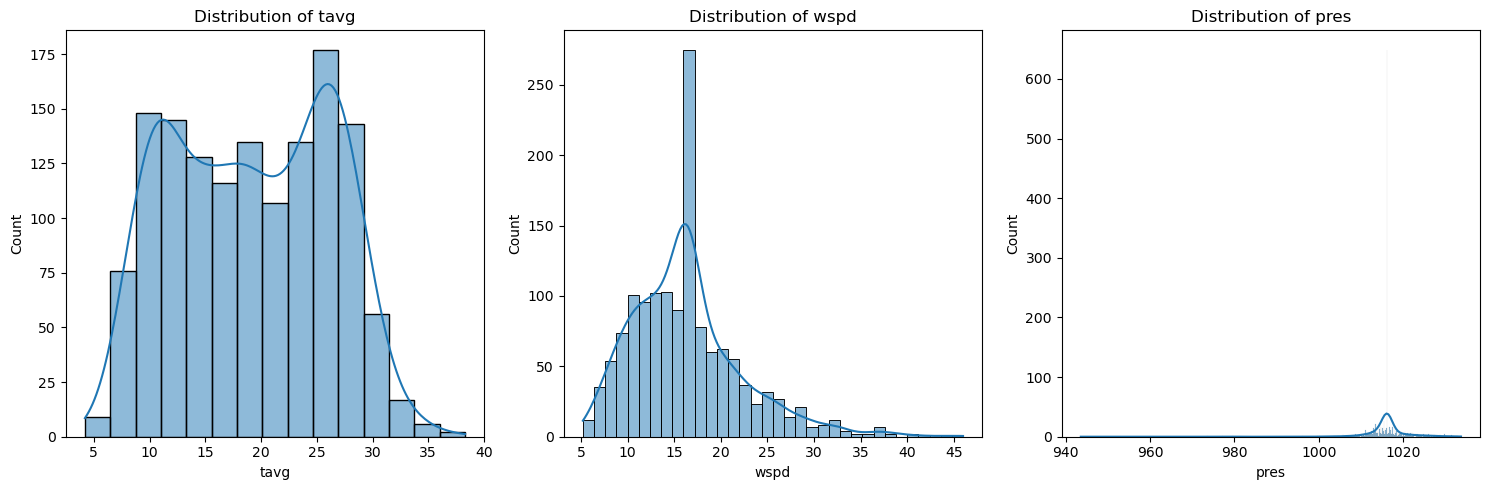

In [221]:


# Ensure 'date' is in the right format if not already
df_main['date'] = pd.to_datetime(df_main['date'])

# Drop any non-numeric columns or categorical columns
df_main = df_main.select_dtypes(include=[np.number])

# Fill NaN values with forward fill or backward fill
df_main = df_main.ffill().bfill()

# Define relevant features for polynomial expansion
relevant_features = ['tavg', 'wspd', 'pres']  # example

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df_main[relevant_features])

# Get the polynomial feature names
poly_feature_names = poly.get_feature_names_out(relevant_features)

# Convert to DataFrame
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)

# Select the target variable (ensure it's numeric)
y = df_main['MELLEGUE']  # or any other target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly_df, y, test_size=0.3, random_state=42)

# Initialize and train Ridge Regression model with the best alpha
ridge_model = Ridge(alpha=100.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Mean Squared Error (MSE) with Ridge Regression: {mse_ridge}")
print(f"R-squared (R²) with Ridge Regression: {r2_ridge}")

# Plot the distributions of relevant features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df_main['tavg'], kde=True)
plt.title('Distribution of tavg')

plt.subplot(1, 3, 2)
sns.histplot(df_main['wspd'], kde=True)
plt.title('Distribution of wspd')

plt.subplot(1, 3, 3)
sns.histplot(df_main['pres'], kde=True)
plt.title('Distribution of pres')

plt.tight_layout()
plt.show()


Random Forest R²: 0.965862061654613
Random Forest RMSE: 1.6586134196750226
y_test size: 280, y_pred_rf size: 280


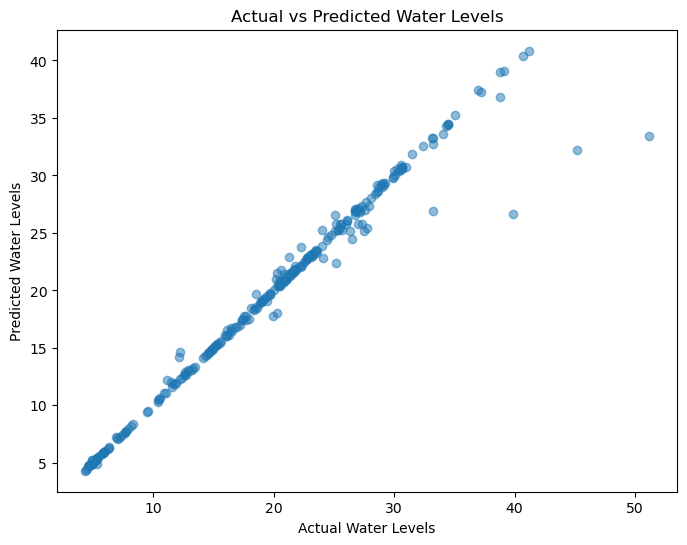

In [223]:
# Exclude 'MELLEGUE' and 'date' columns
X = tunis_dams_rain_data.drop(columns=['MELLEGUE', 'date'])

# Use 'MELLEGUE' as the target variable
y = tunis_dams_rain_data['MELLEGUE']

# Ensure only numeric columns in X
X = X.select_dtypes(include=[np.number])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print(f"Random Forest R²: {r2_score(y_test, y_pred_rf)}")

# Manually calculate RMSE
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
print(f"Random Forest RMSE: {rmse}")

# Ensure correct sizes of y_test and y_pred_rf
print(f"y_test size: {len(y_test)}, y_pred_rf size: {len(y_pred_rf)}")

# Scatter plot of actual vs predicted values (with correctly sized arrays)
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Actual vs Predicted Water Levels')
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.show()


Dataset loaded from '../../data/clean/cleaned_dataset_with_half_of_year.csv'.
Ridge Regression with Seasonal Features - Mean Squared Error: 1518.6264597359082
Ridge Regression with Seasonal Features - R² Score: -0.011824394593819898


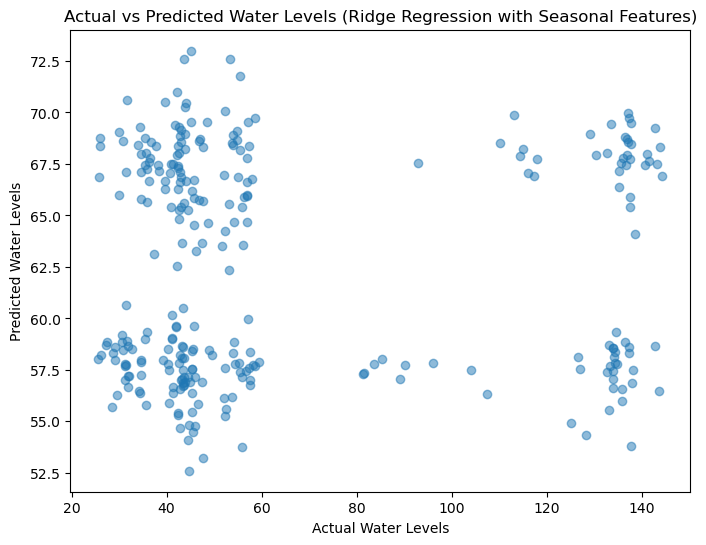

In [225]:
# Define the file path
file_path = '../../data/clean/cleaned_dataset_with_half_of_year.csv'

# Step 1: Load the dataset if it exists
if os.path.isfile(file_path):
    df_main = pd.read_csv(file_path)
    print(f"Dataset loaded from '{file_path}'.")
else:
    raise FileNotFoundError(f"File '{file_path}' does not exist. Please check the file path or generate the dataset first.")

# Step 2: One-hot encode the 'half_of_year' feature and include other features
X = pd.get_dummies(df_main[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'half_of_year']], drop_first=True)
y = df_main['average_water_level']

# Step 3: Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Step 5: Train the Ridge model
ridge_model.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Step 7: Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Step 8: Display the evaluation metrics
print(f"Ridge Regression with Seasonal Features - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression with Seasonal Features - R² Score: {r2_ridge}")

# Step 9: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.title('Actual vs Predicted Water Levels (Ridge Regression with Seasonal Features)')
plt.show()

In [227]:
cleaned_dataset_with_half_of_year = pd.DataFrame({
    'season': ['summer', 'winter', 'summer', 'winter', 'spring'],
    'MELLEGUE': [100, 200, 150, 175, 160],
    'date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'feature1': [10.5, 20.5, 15.5, 18.5, 16.5],
    'feature2': [30.1, 25.3, 27.8, 22.6, 26.7]
})

# Assuming 'season' is the categorical column, use one-hot encoding
cleaned_dataset_with_half_of_year_encoded = pd.get_dummies(cleaned_dataset_with_half_of_year, columns=['season'])

# Drop non-numeric columns like 'date'
X = cleaned_dataset_with_half_of_year_encoded.drop(columns=['MELLEGUE', 'date'])  # Drop target column and 'date'
y = cleaned_dataset_with_half_of_year_encoded['MELLEGUE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1159.4025000000008


In [229]:
# Load the dataset
weather_data = pd.read_csv(weather_data_path)

# Check the available column names
print(weather_data.columns)


Index(['date', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres', 'tsun'],
      dtype='object')


Dataset loaded from '../../data/clean/cleaned_dataset_with_half_of_year.csv'.
Ridge Regression with Seasonal Features - Mean Squared Error: 1518.6264597359082
Ridge Regression with Seasonal Features - R² Score: -0.011824394593819898


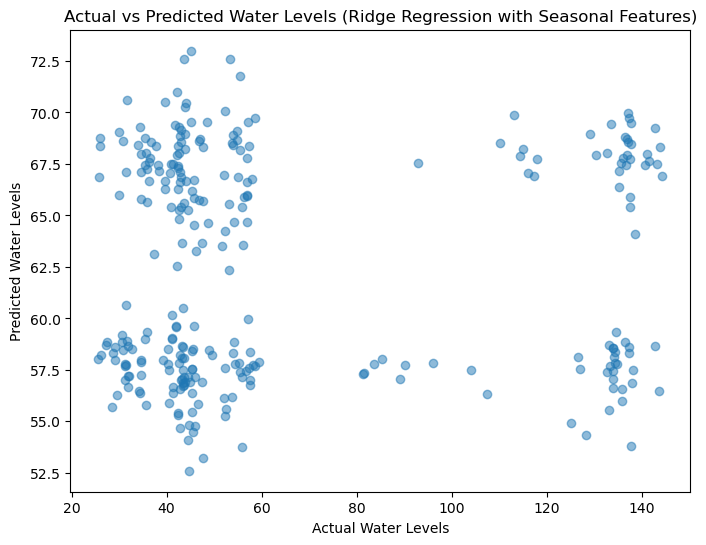

In [234]:
# Define the file path
file_path = '../../data/clean/cleaned_dataset_with_half_of_year.csv'

# Step 1: Load the dataset if it exists
if os.path.isfile(file_path):
    df_main = pd.read_csv(file_path)
    print(f"Dataset loaded from '{file_path}'.")
else:
    raise FileNotFoundError(f"File '{file_path}' does not exist. Please check the file path or generate the dataset first.")

# Step 2: One-hot encode the 'half_of_year' feature and include other features
X = pd.get_dummies(df_main[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'half_of_year']], drop_first=True)
y = df_main['average_water_level']

# Step 3: Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Step 5: Train the Ridge model
ridge_model.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Step 7: Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Step 8: Display the evaluation metrics
print(f"Ridge Regression with Seasonal Features - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression with Seasonal Features - R² Score: {r2_ridge}")

# Step 9: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.title('Actual vs Predicted Water Levels (Ridge Regression with Seasonal Features)')
plt.show()


Dataset loaded from '../../data/clean/cleaned_dataset_with_half_of_year.csv'.
Gradient Boosting with Seasonal Features - Mean Squared Error: 1504.4878663493969
Gradient Boosting with Seasonal Features - R² Score: -0.0024041888532964073


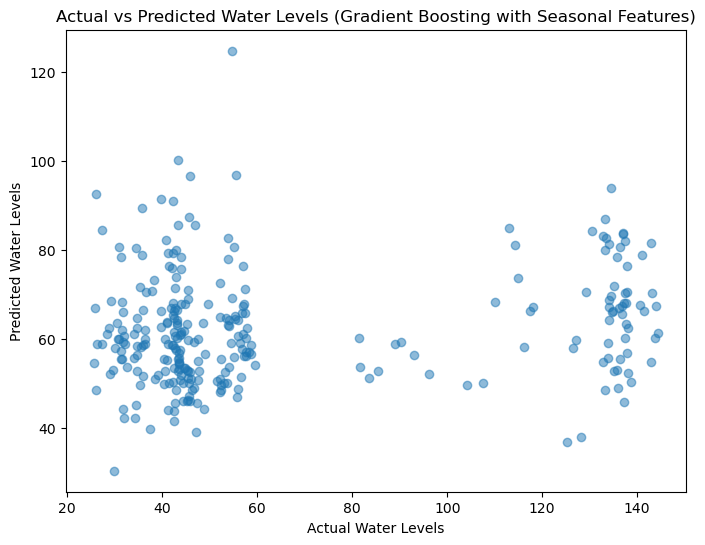

In [236]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the file path
file_path = '../../data/clean/cleaned_dataset_with_half_of_year.csv'

# Step 1: Load the dataset if it exists
if os.path.isfile(file_path):
    df_main = pd.read_csv(file_path)
    print(f"Dataset loaded from '{file_path}'.")
else:
    raise FileNotFoundError(f"File '{file_path}' does not exist. Please check the file path or generate the dataset first.")

# Step 2: One-hot encode the 'half_of_year' feature and include other features
X = pd.get_dummies(df_main[['tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'half_of_year']], drop_first=True)
y = df_main['average_water_level']

# Step 3: Split data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Step 5: Train the model
gb_model.fit(X_train, y_train)

# Step 6: Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Step 7: Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting with Seasonal Features - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting with Seasonal Features - R² Score: {r2_gb}")

# Step 8: Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.title('Actual vs Predicted Water Levels (Gradient Boosting with Seasonal Features)')
plt.show()


In [244]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Gradient Boosting model
gboost = GradientBoostingRegressor(random_state=42)

# Setup Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gboost, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_gboost = grid_search.best_estimator_

# Output the best hyperparameters found
print(f"Best hyperparameters found: {best_params}")


Best hyperparameters found: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}


Tuned Gradient Boosting – Mean Squared Error: 1446.974843813587
Tuned Gradient Boosting – R² Score: 0.035915358942990805


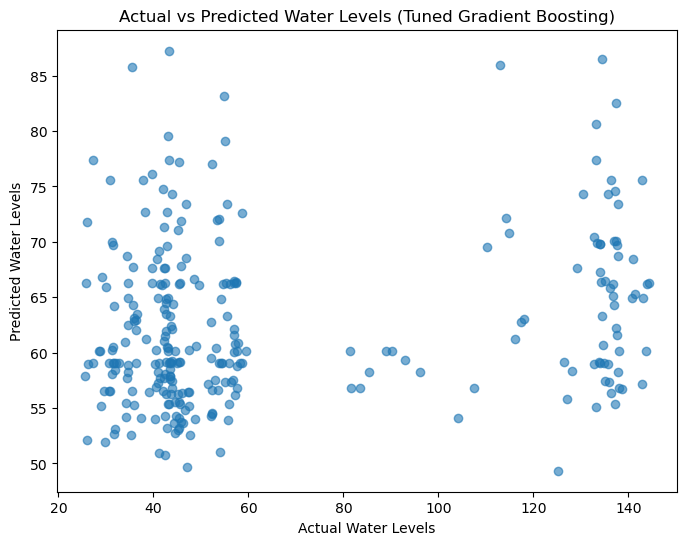

In [245]:
# Predict using the best Gradient Boosting model
y_pred_best_gboost = best_gboost.predict(X_test)

# Calculate the MSE and R^2 score
mse_best_gboost = mean_squared_error(y_test, y_pred_best_gboost)
r2_best_gboost = r2_score(y_test, y_pred_best_gboost)

# Print the results
print(f"Tuned Gradient Boosting – Mean Squared Error: {mse_best_gboost}")
print(f"Tuned Gradient Boosting – R² Score: {r2_best_gboost}")

# Plot Actual vs Predicted for the tuned model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best_gboost, alpha=0.6)
plt.title('Actual vs Predicted Water Levels (Tuned Gradient Boosting)')
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.show()



In [248]:
df_main['tavg'] = df_main['tavg'].fillna(df_main['tavg'].median())
df_main['tmin'] = df_main['tmin'].fillna(df_main['tmin'].median())
df_main['tmax'] = df_main['tmax'].fillna(df_main['tmax'].median())
df_main['prcp'] = df_main['prcp'].fillna(df_main['prcp'].median())
df_main['wspd'] = df_main['wspd'].fillna(df_main['wspd'].median())
df_main


,date,MELLEGUE,BEN METIR,KASSEB,BARBARA,SIDI SALEM,BOU-HEURTMA,JOUMINE,GHEZALA,SEJNANE,...,prcp,wdir,wspd,pres,Year_y,Month_y,Day_y,average_water_level,half_of_year,season
0,2014-01-08,26.721,48.091,67.485,60.787,448.591,71.317,84.411,7.883,89.022,...,0.0,0.0,0.0,0.0,2014,1,8,50.77100,First Half,Winter
1,2014-01-09,21.315,44.527,64.278,58.725,400.528,62.800,74.739,7.221,79.611,...,0.0,213.0,10.7,0.0,2014,1,9,47.21125,First Half,Winter
2,2014-01-10,26.113,40.278,61.178,57.022,360.543,54.719,66.061,6.586,69.456,...,0.0,0.0,8.3,0.0,2014,1,10,46.14775,First Half,Winter
3,2014-01-12,25.978,33.311,55.713,57.318,346.387,46.205,53.778,5.995,51.276,...,0.0,0.0,0.0,0.0,2014,1,12,43.08000,First Half,Winter
4,2014-02-08,26.519,47.955,67.405,60.708,446.569,71.011,84.088,7.854,88.667,...,0.0,66.0,16.4,0.0,2014,2,8,50.64675,First Half,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,2019-02-01,34.463,43.956,36.424,57.392,223.533,47.300,65.410,7.091,100.669,...,0.0,240.0,16.0,1010.1,2019,2,1,43.05875,First Half,Winter
1396,2019-02-02,30.051,57.874,51.693,53.646,401.352,84.711,89.206,9.971,128.098,...,0.0,240.0,29.0,1004.4,2019,2,2,48.31600,First Half,Winter
1397,2019-02-03,31.132,59.347,58.203,56.948,547.343,93.657,94.387,10.047,119.841,...,0.0,255.0,24.7,1010.2,2019,2,3,51.40750,First Half,Winter
1398,2019-02-04,35.407,58.590,63.044,65.100,564.146,108.697,98.046,9.939,111.721,...,0.0,279.0,24.1,1014.5,2019,2,4,55.53525,First Half,Winter


In [250]:


# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [10, 20, 30]
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best hyperparameters found: {best_params}")


Best hyperparameters found: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [251]:
# Train the Gradient Boosting model with the best parameters
best_gbr_model = GradientBoostingRegressor(
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

best_gbr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbr = best_gbr_model.predict(X_test)

# Step 3: Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Optimized Gradient Boosting - Mean Squared Error: {mse_gbr}")
print(f"Optimized Gradient Boosting - R² Score: {r2_gbr}")


Optimized Gradient Boosting - Mean Squared Error: 1453.4871179852664
Optimized Gradient Boosting - R² Score: 0.03157638682187136


In [252]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use the scaled data in the Gradient Boosting Regressor
best_gbr_model.fit(X_train_scaled, y_train)
y_pred_scaled_gbr = best_gbr_model.predict(X_test_scaled)

# Evaluate the scaled model
mse_scaled_gbr = mean_squared_error(y_test, y_pred_scaled_gbr)
r2_scaled_gbr = r2_score(y_test, y_pred_scaled_gbr)

print(f"Scaled Gradient Boosting - Mean Squared Error: {mse_scaled_gbr}")
print(f"Scaled Gradient Boosting - R² Score: {r2_scaled_gbr}")


Scaled Gradient Boosting - Mean Squared Error: 1458.1413950850542
Scaled Gradient Boosting - R² Score: 0.02847535359637121


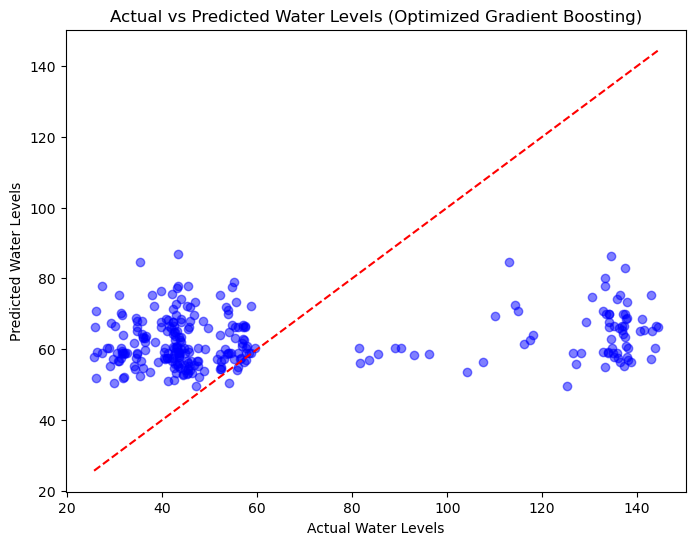

In [256]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5, color='blue')
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.title('Actual vs Predicted Water Levels (Optimized Gradient Boosting)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()


Best hyperparameters found: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 100}
Gradient Boosting - Mean Squared Error: 1446.974843813587
Gradient Boosting - R² Score: 0.035915358942990805


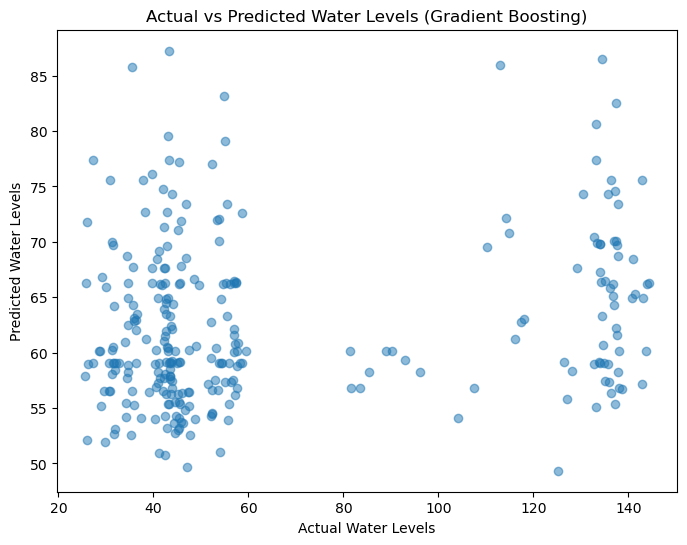

In [258]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the Gradient Boosting model
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Set up the GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Train the model on the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters found: {best_params}")

# Re-train the model with the best parameters
best_gbr_model = GradientBoostingRegressor(**best_params, random_state=42)
best_gbr_model.fit(X_train, y_train)

# Step 2: Predict on the test set and evaluate
y_pred_gbr = best_gbr_model.predict(X_test)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting - Mean Squared Error: {mse_gbr}")
print(f"Gradient Boosting - R² Score: {r2_gbr}")

# Plot Actual vs Predicted for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.5)
plt.xlabel('Actual Water Levels')
plt.ylabel('Predicted Water Levels')
plt.title('Actual vs Predicted Water Levels (Gradient Boosting)')
plt.show()


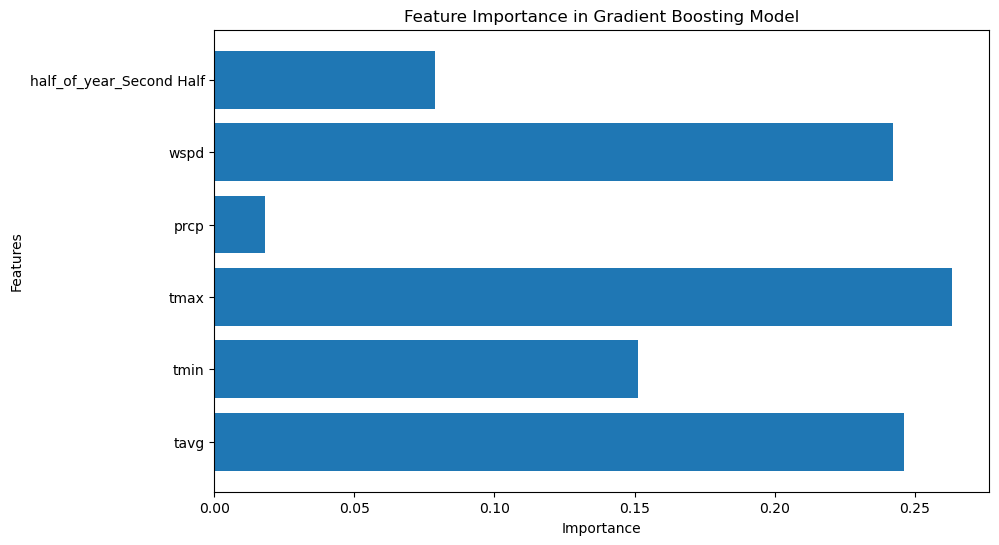

In [260]:
# Check feature importance in Gradient Boosting
importances = best_gbr_model.feature_importances_
features = X_train.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()


In [264]:
from sklearn.preprocessing import PolynomialFeatures

# Creating polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly.fit_transform(X)

print(f"Original features shape: {X.shape}")
print(f"Transformed features shape: {X_poly.shape}")


Original features shape: (1400, 6)
Transformed features shape: (1400, 27)


In [266]:
from xgboost import XGBRegressor

# Train XGBoost Regressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predictions and Evaluation
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost MSE: {mse_xgb}, R² Score: {r2_xgb}")


XGBoost MSE: 1809.0897064993974, R² Score: -0.20535309082062736


In [268]:
#Hyperparameter Tuning (Full Grid Search)
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
}

grid_xgb = GridSearchCV(XGBRegressor(), param_grid_xgb, scoring='neg_mean_squared_error', cv=3, n_jobs=2)
grid_xgb.fit(X_train, y_train)

best_params_xgb = grid_xgb.best_params_
print(f"Best hyperparameters for XGBoost: {best_params_xgb}")



Best hyperparameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 100}


In [270]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Define the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(gbr_model, X, y, scoring='neg_mean_squared_error', cv=5)

# Print the mean and standard deviation of cross-validation scores
print(f"Mean CV MSE: {-cv_scores.mean()}, Std CV MSE: {cv_scores.std()}")


Mean CV MSE: 2059.6492500210043, Std CV MSE: 1417.3792376687024


In [272]:
from sklearn.model_selection import cross_val_score

# Cross-validation with Gradient Boosting
cv_scores = cross_val_score(gbr_model, X, y, scoring='neg_mean_squared_error', cv=5)
print(f"Mean CV MSE: {-cv_scores.mean()}, Std CV MSE: {cv_scores.std()}")


Mean CV MSE: 2059.6492500210043, Std CV MSE: 1417.3792376687024


In [274]:
print(f"y_test shape: {y_test.shape}")
print(f"y_pred shape: {y_pred.shape}")


y_test shape: (280,)
y_pred shape: (1,)


In [276]:
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

# Find columns that are in one set but not the other
print("Columns in training set but not in test set:", train_columns - test_columns)
print("Columns in test set but not in training set:", test_columns - train_columns)


Columns in training set but not in test set: set()
Columns in test set but not in training set: set()


In [278]:
# Step 1: Sicherstellen, dass die Features korrekt transformiert werden
# Annahme: Du hast bereits 'half_of_year' in X_train und X_test kodiert (z.B. mit pd.get_dummies)
# Jetzt, überprüfe und angleiche die Spalten

# Missing columns in X_test
missing_columns = set(X_train.columns) - set(X_test.columns)
if missing_columns:
    print("Missing columns in X_test:", missing_columns)
    for col in missing_columns:
        X_test[col] = 0  # Standardwert für fehlende Spalten setzen

# Extra columns in X_test (Spalten, die in X_test vorhanden, aber nicht in X_train sind)
extra_columns = set(X_test.columns) - set(X_train.columns)
if extra_columns:
    print("Extra columns in X_test:", extra_columns)
    X_test.drop(columns=extra_columns, inplace=True)

# Step 2: Spaltenreihenfolge angleichen
X_test = X_test[X_train.columns]

# Step 3: Jetzt kannst du die Vorhersage mit dem Modell machen
try:
    y_pred = model.predict(X_test)
except Exception as e:
    print(f"Fehler bei der Vorhersage: {str(e)}")

# Step 4: Überprüfen, ob die Shapes übereinstimmen
if y_test.shape != y_pred.shape:
    print(f"Shape mismatch: y_test shape is {y_test.shape}, y_pred shape is {y_pred.shape}")
else:
    # Berechne Residuen und plotte sie, falls die Shapes übereinstimmen
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Actual Water Levels')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()


Fehler bei der Vorhersage: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- half_of_year_Second Half
- prcp
- tavg
- tmax
- tmin
- ...
Feature names seen at fit time, yet now missing:
- feature1
- feature2
- season_spring
- season_summer
- season_winter

Shape mismatch: y_test shape is (280,), y_pred shape is (1,)


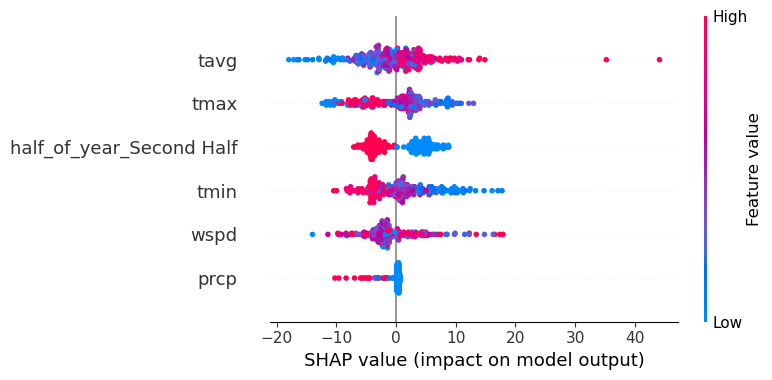

In [282]:
import shap

# SHAP summary plot for Gradient Boosting model
explainer = shap.TreeExplainer(gbr_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [284]:
import os
import yaml

# Print the current working directory
print(f"Current working directory: {os.getcwd()}")

# Correct relative path from the notebooks folder to the root directory
config_path = os.path.join('..', 'config.yaml')

# Try loading the config.yaml file
try:
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)
        print("Config file loaded successfully.")
except FileNotFoundError:
    print(f"File {config_path} not found. Please check if the file exists in the correct directory.")

# Example of how to access values from the config.yaml
try:
    raw_data_path = config['data_paths']['raw_data']
    cleaned_data_path = config['data_paths']['cleaned_data']
    model_output_path = config['data_paths']['model_output']
    print(f"Raw data path: {raw_data_path}")
    print(f"Cleaned data path: {cleaned_data_path}")
    print(f"Model output path: {model_output_path}")
except KeyError as e:
    print(f"Missing key in config.yaml: {e}")


Current working directory: /Users/mehdisahraoui/Desktop/IronHackordner/Iron_Hack_Final_Project/Week9/Iron_Hack_Water_in_Tunisia/notebooks
Config file loaded successfully.
Raw data path: ./data/raw_data.csv
Cleaned data path: ./data/cleaned_data.csv
Model output path: ./models/output_model.pkl


In [337]:
from sklearn.metrics import mean_absolute_error

# Defining X (features) and y (target)
# Including the relevant features, such as lag_1, lag_7, and others
X = tunis_dams_rain_data_cleaned[['lag_1', 'lag_7', 'lag_30', 'SILIANA', 'RMIL', 'ABID', 'CHIBA']]  # Add more relevant features here
y = tunis_dams_rain_data_cleaned['MELLEGUE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Evaluation
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rf)
print(f"Random Forest MAE: {mae}")

# Extract feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to hold the feature names and their corresponding importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


Random Forest R²: 0.9823463269449234
Random Forest RMSE: 1.1524774624626306
Random Forest MAE: 0.5323152919708021


In [329]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [339]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Cross-Validated R²: {cv_scores.mean()}")


Cross-Validated R²: 0.7520551835196496


In [353]:
# Check if training and test features match
print("Training Features:", X_train.columns)
print("Test Features:", X_test.columns)

# Ensure they are the same
assert list(X_train.columns) == list(X_test.columns), "Train and test feature names do not match!"


Training Features: Index(['lag_1', 'lag_7', 'lag_30', 'SILIANA', 'RMIL', 'ABID', 'CHIBA'], dtype='object')
Test Features: Index(['lag_1', 'lag_7', 'lag_30', 'SILIANA', 'RMIL', 'ABID', 'CHIBA'], dtype='object')


In [357]:
# Create lag features in the entire dataset
tunis_dams_rain_data_cleaned['lag_1'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(1)
tunis_dams_rain_data_cleaned['lag_7'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(7)
tunis_dams_rain_data_cleaned['lag_30'] = tunis_dams_rain_data_cleaned['MELLEGUE'].shift(30)

# Drop any rows with NaN values created by shifting
tunis_dams_rain_data_cleaned.dropna(inplace=True)

# Now define X and y after the feature engineering
X = tunis_dams_rain_data_cleaned[['lag_1', 'lag_7', 'lag_30', 'SILIANA', 'RMIL', 'ABID', 'CHIBA']]
y = tunis_dams_rain_data_cleaned['MELLEGUE']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [359]:
# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))


Random Forest R²: 0.9621128626794608
Random Forest RMSE: 1.7653708465099012
Random Forest MAE: 0.7146349626865662
